#                                       CREDIT EDA CASE STUDY

In this case study we will be doing a thorough study of the credit and loan application dataset of banks. We will be identifying that which applicant or segment they should approach for loan so that they can increase their profit and decrease the risk of loss.

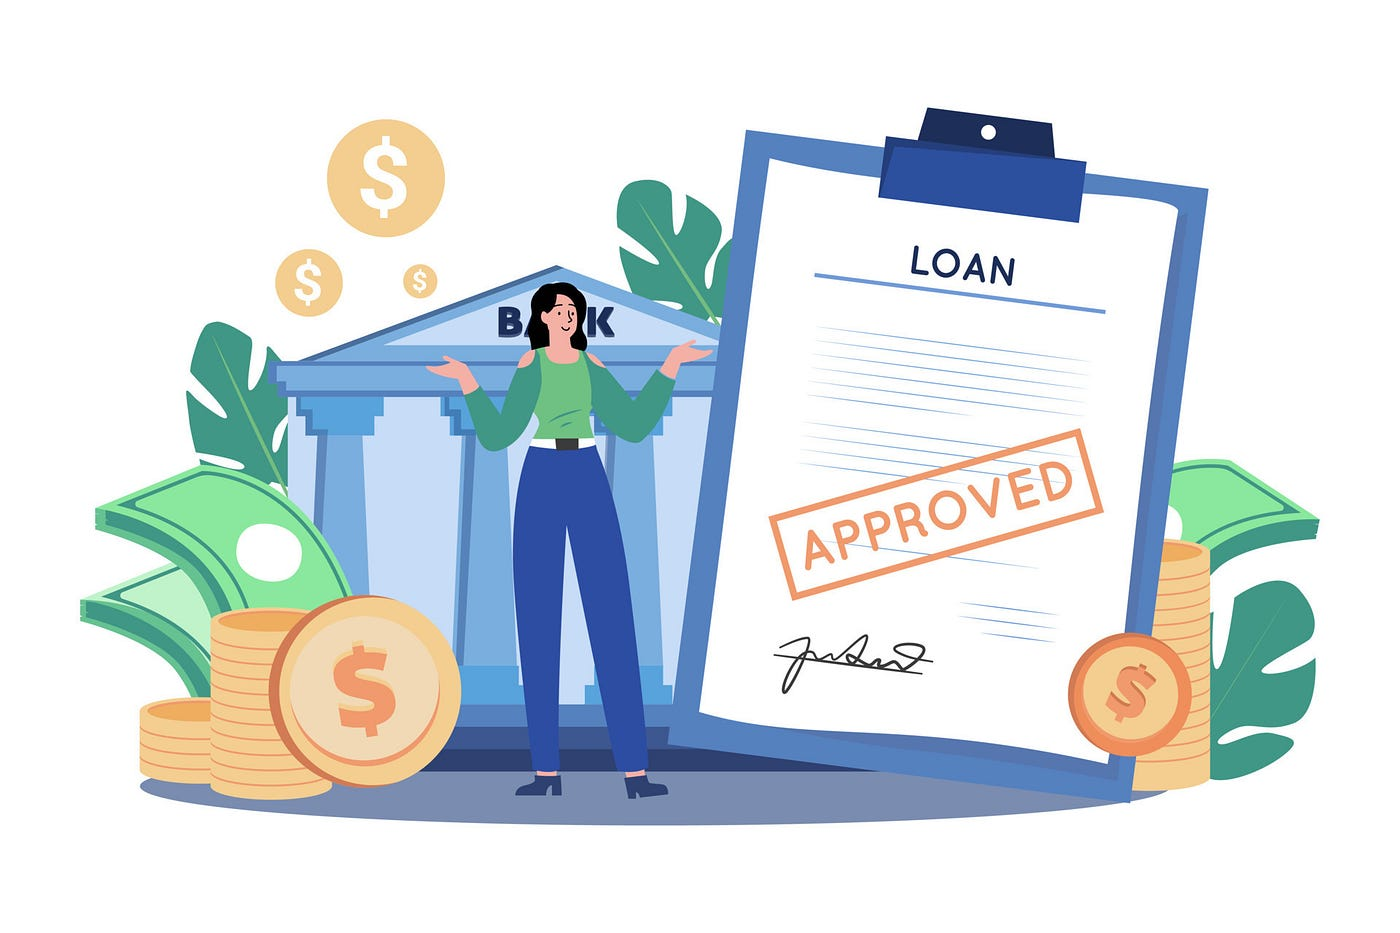

# Current Application Data

In [1]:
#importing necessary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
#reading the dataset of 'application_data.csv' in df.
df = pd.read_csv('application_data.csv')

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [7]:
#checking the shape of data (rows, columns) in the data
df.shape

(307511, 122)

In [8]:
#checking the columns info in data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
#checking the statstical data of dataframe
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Missing Value Identification & Treatment

In [10]:
#checking the missing values percentage in the data
round((df.isnull().sum()/len(df)*100),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
# List of missing values having more than 50% missing values
cut_off=40
cols_to_drop=list(df.columns[100*df.isnull().mean()>cut_off])
print(cols_to_drop)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [12]:
# Dropping the columns having more than 50% missing values
df=df.drop(cols_to_drop,axis=1)

In [13]:
df.shape

(307511, 73)

In [14]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [15]:
# Removing the columns which seems to be irrelevant for analysis
cols_irrelevant = ['DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
                   'FLAG_PHONE','FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                   'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE', 
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                 'DAYS_LAST_PHONE_CHANGE', 'NAME_TYPE_SUITE']
cols_irrelevant

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_TYPE_SUITE']

In [16]:
df = df.drop(cols_irrelevant, axis=1)

In [17]:
df.shape

(307511, 52)

In [18]:
#counting the % of missing values in the remaining columns
round((df.isnull().sum()/len(df)*100),3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_ID_PUBLISH                 0.000
OCCUPATION_TYPE                31.346
CNT_FAM_MEMBERS                 0.001
REGION_RATING_CLIENT            0.000
REGION_RATING_CLIENT_W_CITY     0.000
ORGANIZATION_TYPE               0.000
EXT_SOURCE_2                    0.215
EXT_SOURCE_3                   19.825
FLAG_DOCUMEN

**Handling missing values in `AMT_REQ_CREDIT_BUREAU` columns:**

Columns containing the `AMT_REQ_CREDIT_BUREAU` information refer to the information which contains information of the financial company or any other companies which may have hit the beauro to check the credit score of the applicant. This indicated:

1. At how many placed the applicant is looking for a loan
2. Is applicant is already having any loan or applied for it in last one year

As there are 5 columns of this data which contain this information from hour to year and it doesn't make sense to calculate the data for such a shorter period of time such as hour, day, week , month. And on the other side it also does not make sense to calculate it for year as it will have so much larger gap so better option is to go with quarterly report it will show all the necessary information.

1. So we'll handle the missing values in the `AMT_REQ_CREDIT_BUREAU_QRT`
2. And drop the Hour, Day, Week, Month, and Year columns in the `AMT_REQ_CREDIT_BUREAU`

In [19]:
# Hanling the 'AMT_REQ_CREDIT_BUREAU_QRT' column
df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

As this is an integer type variable, thus it has values 0,1,2, etc. We can not impute missing values with the mean or median here (as this data shows the frequency that how many times the credit score was checked and if we choose to impute mean or median in that case if there would be any outliers present in the dataset it will impact on the overall decision of data which may result in rejecting customers with no credit score checks), Thus mode would be a more suitable approach to replace the missing values.

In [20]:
# Changing the data type of 'AMT_REQ_CREDIT_BUREAU_QRT' to object
df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

In [21]:
# Checking the frequecy in the data
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

As we can observe 0 is the most frequent value so we will replace the missing values with 0 in `AMT_REQ_CREDIT_BUREAU_QRT`.


**Handling the missing values in `EXT_SOURCE_2` & `EXT_SOURCE_2`:**

This is a normalized score from external data sets.

In [22]:
# counting the rows where 'EXT_SOURCE_2' & 'EXT_SOURCE_3' are empty
len(df[pd.isna(df['EXT_SOURCE_2']) & pd.isna(df['EXT_SOURCE_3'])])

230

In [23]:
df.shape

(307511, 52)

As 230 rows are very less amount of 307511 rows so dropping this rows will not effect the analysis

In [24]:
# Let us compare the 'EXT_SOURCE_2' & 'EXT_SOURCE_3' with describe function
round(df.loc[:,['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),4)

,EXT_SOURCE_2,EXT_SOURCE_3
count,306851.0000,246546.0000
mean,0.5144,0.5109
std,0.1911,0.1948
min,0.0000,0.0005
25%,0.3925,0.3706
50%,0.5660,0.5353
75%,0.6636,0.6691
max,0.8550,0.8960


As we can observe the mean and median values in this both the columns have a lesser gap, and also the variation from 25th to 75th percentile is equally distributed. So now we can impute the missing values in `EXT_SOURCE_2`  &  `EXT_SOURCE_3` with the mean values.


**Handling the missing values in `AMT_GOODS_PRICE` column**

In [25]:
# Treanting the missing values in the 'AMT_GOODS_PRICE'
round(df['AMT_GOODS_PRICE'].describe(), 2)

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Standard deviation of `AMT_GOODS_PRICE` is very high, lets see if there are any outliers in the data.

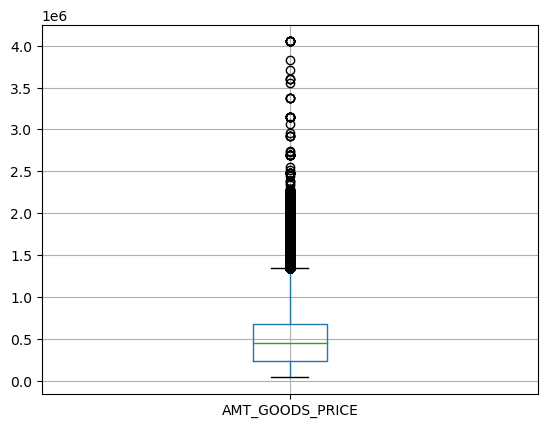

In [26]:
df.boxplot(column = ['AMT_GOODS_PRICE'])
plt.show()

As we can observe the standard price of this goods is very high and also there are so many outliers in this data, so imputing the mean or median will be incorrect and as there is very less amount (0.09%) of null values so we should drop this rows.


**Handling the missing values in the `OCCUPATION_TYPE` column**

In [27]:
# checking the null values in the "OCCUPATION_TYPE"
df['OCCUPATION_TYPE'].isna().value_counts()

False    211120
True      96391
Name: OCCUPATION_TYPE, dtype: int64

We can leave this field with the null value as this is not the mendatory field in the data analysis and it might be optional so applicants have not filled this.

**Checking & Changing The Data Type Of The Columns**

In [28]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
ORGANIZATION_TYPE                object
EXT_SOURCE_2                    float64


There is no need to change the data type of the columns at this time as it seems to be correct

# Outlier & Possible Treatment

In [29]:
# Creating 2 int and float value columns for checking the outliers in the data
Num_col = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','CNT_FAM_MEMBERS','AMT_GOODS_PRICE',
         'EXT_SOURCE_2','EXT_SOURCE_3']

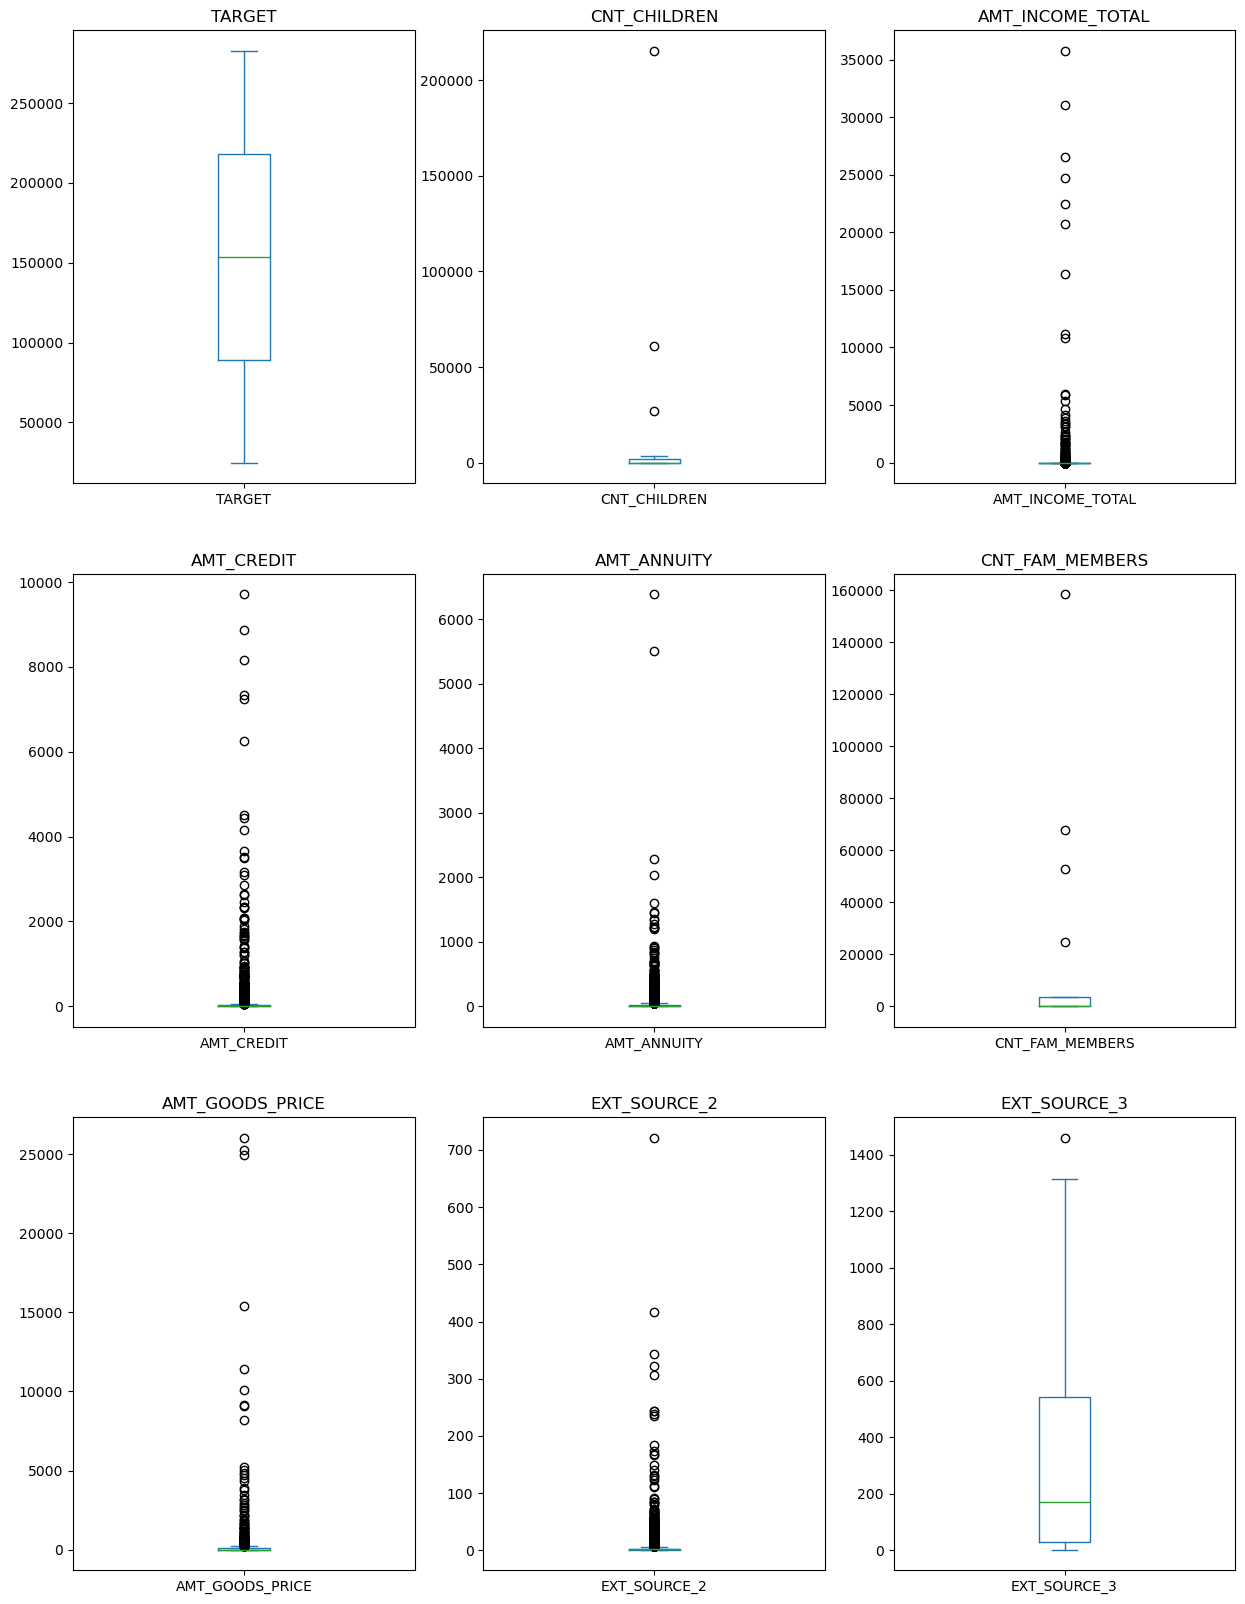

In [30]:
# For checking the outliers we'll plot the boxplot in Col_1
k=0
plt.figure(figsize=(15,20))
for i in Num_col:
    k=k+1
    plt.subplot(3,3,k)
    df[i].value_counts().plot.box();
    plt.title(i)
plt.show()

As we can observe there are outliers present in this data set. `CNT_CHILDREN` has some outliers present in that and this can be due to human error.

In [31]:
# Checking the value count in "CNT_CHILDREN"
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

Some of them naturally seem to be outliers thus we need to **drop** these rows as it is a very small amount presenting the outlier and will also not impact the decision so we'll drop this rows.

In [32]:
#checking the value count in "AMT_INCOME_TOTAL"
(round(df['AMT_INCOME_TOTAL'].value_counts(),2))

1.350000e+05    35750
1.125000e+05    31019
1.575000e+05    26556
1.800000e+05    24719
9.000000e+04    22483
2.250000e+05    20698
2.025000e+05    16341
6.750000e+04    11147
2.700000e+05    10827
8.100000e+04     6001
3.150000e+05     5862
2.475000e+05     5344
1.260000e+05     4668
3.600000e+05     4115
1.215000e+05     3848
9.900000e+04     3633
2.925000e+05     3418
1.035000e+05     3330
7.650000e+04     3146
1.440000e+05     3123
1.710000e+05     2647
4.500000e+05     2435
1.170000e+05     2390
5.400000e+04     2319
7.200000e+04     2187
1.665000e+05     2053
4.500000e+04     2043
1.080000e+05     1946
3.375000e+05     1790
9.450000e+04     1747
1.620000e+05     1702
1.890000e+05     1691
4.050000e+05     1660
8.550000e+04     1514
1.485000e+05     1486
2.160000e+05     1406
1.305000e+05     1256
5.850000e+04     1182
6.300000e+04     1145
1.935000e+05     1061
1.530000e+05     1012
2.115000e+05      985
3.825000e+05      966
1.395000e+05      834
1.755000e+05      800
5.400000e+

In this case it can be possible that people might have higher income but at the time of analysis it can impact the other variables so we can use **capping method** here to normalize the values.

About the `AMT_GOODS_PRICE`, `EXT_SOURCE_2`, and `EXT_SOURCE_3` we have already discussed above and the other variables where outliers are present `AMT_ANNUITY`, `AMT_CREDIT`it can be possible that some people might have already taken the loans of higher amounts or it can be also possible that they are human errors so either we can drop it if less amount of rows are there or we can use the capping method to treat these columns for analysis.

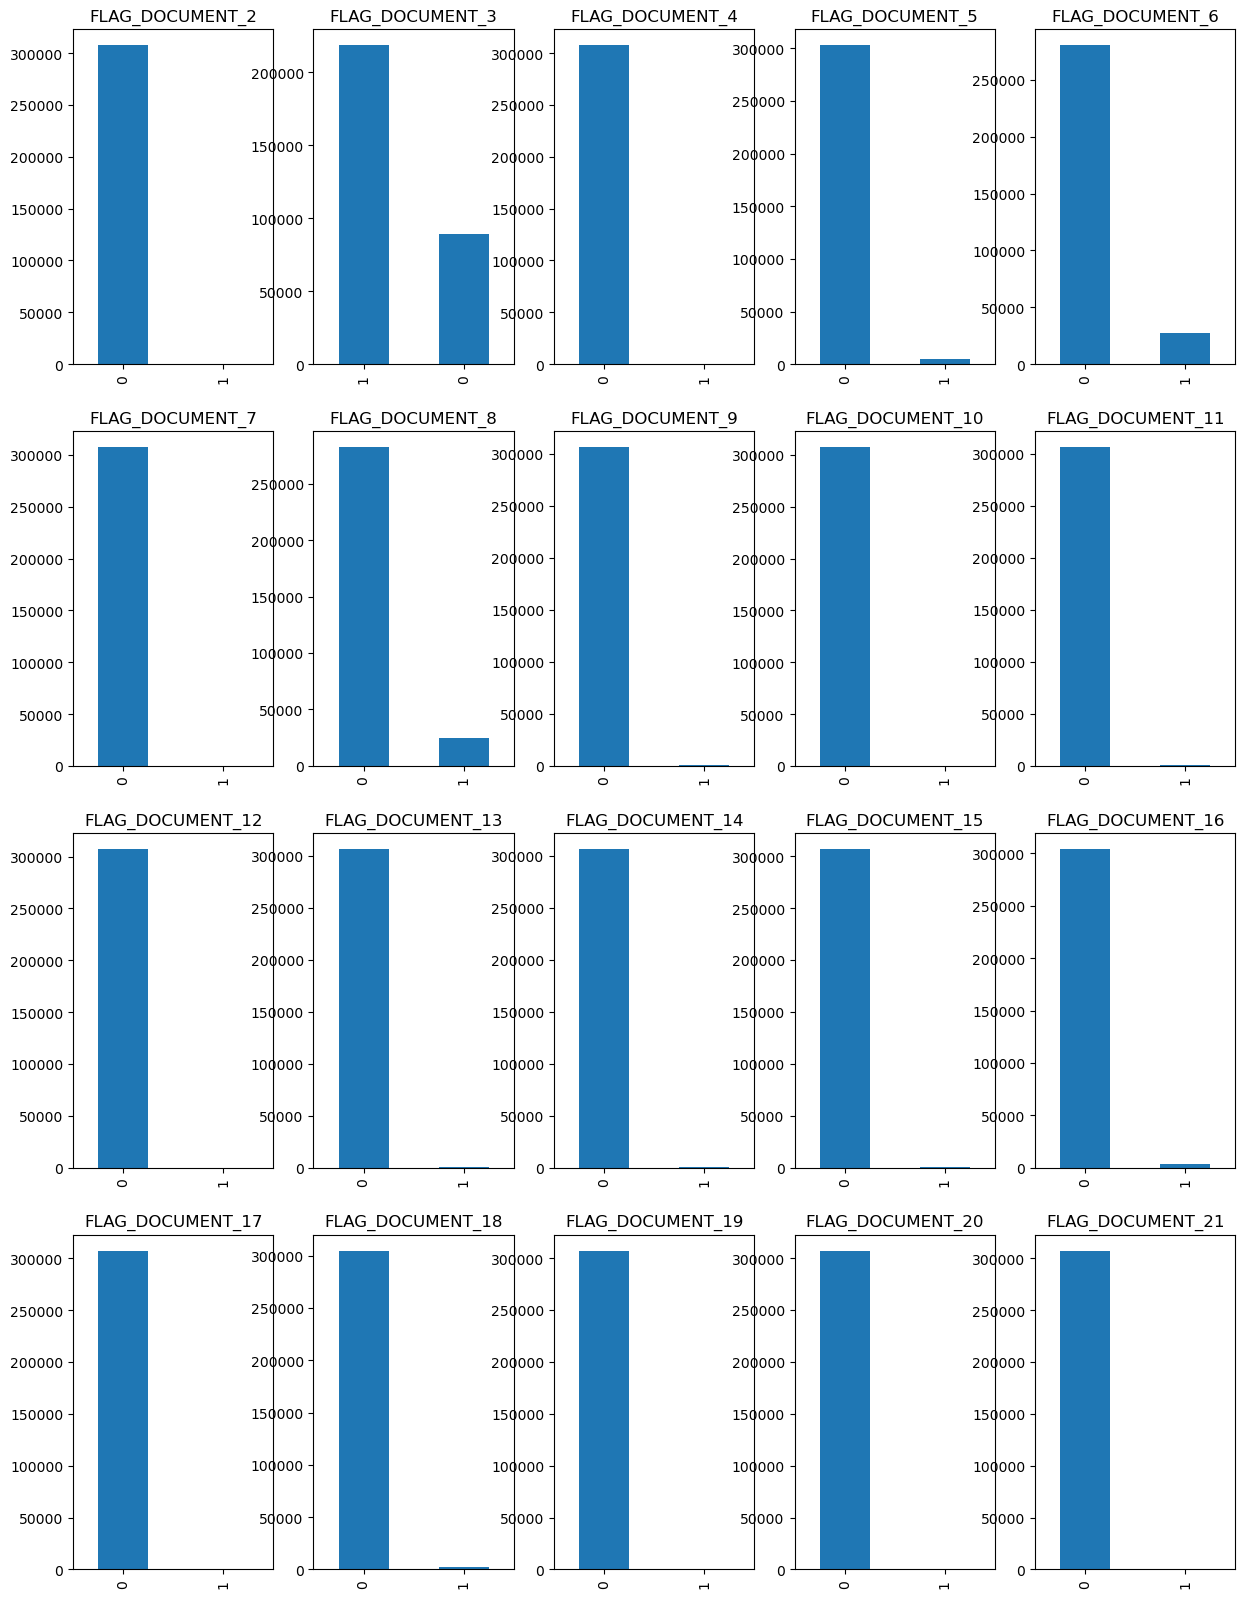

In [33]:
# checking the data imbalance in FLAG_DOCUMENT
col_2 = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
         'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
         'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

# For checking the data imbalance or anomalies we'll plot the boxplot in Col_2 
k=0
plt.figure(figsize=(15,20))
for i in col_2:
    k=k+1
    plt.subplot(4,5,k)
    df[i].value_counts().plot.bar();
    plt.title(i)
plt.show()

As we can observe except `'FLAG_DOCUMENT_3'` there is non of the data is in balance and there is very less count for 1s. So we'll only keep `'FLAG_DOCUMENT_3'` else all columns can be removed.

# Converting The 'DAYS_BIRTH' & 'DAYS_EMPLOYED' Column For Better Analysis:

In [34]:
# Converting the 'DAYS_BIRTH' column to 'age' for better understanding
df['AGE'] = abs(df['DAYS_BIRTH']//365)

In [35]:
# Converting the 'DAYS_EMPLOYED' column to 'YEARS_EMPLOYED' for better understanding
df['YEARS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']//365)

In [36]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,Core staff,2.0,1,1,School,0.622246,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,Laborers,1.0,2,2,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,Core staff,1.0,2,2,Religion,0.322738,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,9


In [37]:
# Dropping the 'DAYS_BIRTH' & 'DAYS_EMPLOYED' columns
df = df.drop(['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1)

**Making the `Age_Group` & `Credit_Group` through Binning process:**

In [38]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
pd.cut(df.AGE[:5],[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])

0      <30
1    40-50
2    50-60
3    50-60
4    50-60
Name: AGE, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [39]:
df.AGE.head()

0    26
1    46
2    53
3    53
4    55
Name: AGE, dtype: int64

In [40]:
df["AGE_GROUP"] = pd.cut(df.AGE,[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])
df.AGE_GROUP.value_counts(normalize= True)

30-40    0.267659
40-50    0.248905
50-60    0.221332
<30      0.146405
60+      0.115700
Name: AGE_GROUP, dtype: float64

In [41]:
# Creating the credit amount group 
round(df['AMT_CREDIT'].describe(),2)

count     307511.00
mean      599026.00
std       402490.78
min        45000.00
25%       270000.00
50%       513531.00
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

In [42]:
def credit_group(x):
    if (x<500000):
        return 'Low'
    elif (x>=500000 and x<750000):
        return 'Medium'
    else:
        return 'High'

In [43]:
df['CREDIT_GROUP'] = df['AMT_CREDIT'].apply(credit_group)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,<30,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,School,0.622246,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-50,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,50-60,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,9,50-60,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,Religion,0.322738,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,50-60,Medium


In [44]:
# Creating the income amount group 
round(df['AMT_INCOME_TOTAL'].describe(),2)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [45]:
def income_group(x):
    if (x<100000):
        return 'Low'
    elif (x>=100000 and x<150000):
        return 'Medium'
    else:
        return 'High'

In [46]:
df['Income_Group'] = df['AMT_INCOME_TOTAL'].apply(income_group)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,Income_Group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,<30,Low,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,School,0.622246,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-50,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,50-60,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,9,50-60,Low,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,Religion,0.322738,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,50-60,Medium,Medium


**Dividing the Data into two datasets on the basis of `'TARGET'` veriable:**

Here there are 2 variables in the `TARGET`column:

i)  1 - client with payment difficulties

ii) 0 - all other cases

Creating 2 dataframes named df_1 (indicates == 1) and df_0 (indicates == 0) for further ploting and better analysis for both the segments:

In [47]:
# Creating df_1
df_1 = df[df['TARGET']==1] 
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,Income_Group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,<30,Low,High
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-1827,Cooking staff,1.0,3,2,Business Entity Type 3,0.548477,0.190706,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,52,8,50-60,High,Medium
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-1029,Laborers,2.0,2,2,Business Entity Type 3,0.306841,0.320163,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,48,4,40-50,High,High
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-4409,Sales staff,2.0,3,3,Self-employed,0.674203,0.399676,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,37,10,30-40,Low,Medium
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-4199,NaN,2.0,2,2,XNA,0.023952,0.720944,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,68,1000,60+,Low,Low


In [48]:
# Creating df_0
df_0 = df[df['TARGET']==0] 
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,Income_Group
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,School,0.622246,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-50,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,50-60,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,9,50-60,Low,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,Religion,0.322738,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,50-60,Medium,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-477,Laborers,2.0,2,2,Other,0.354225,0.621226,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,47,5,40-50,Low,Low


# Univariate Analysis

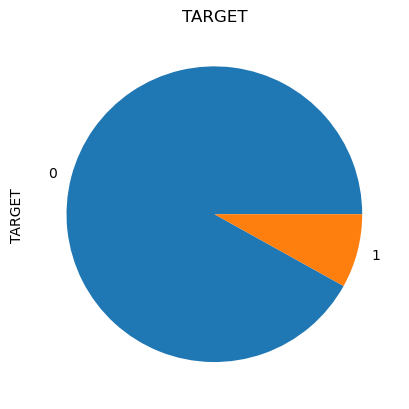

In [49]:
# Ploting the Target veriable
df.TARGET.value_counts().plot(kind='pie')
plt.title('TARGET');

As per this pie chart, we can observe that there are very few people who are facing difficulty in paying installments all others are not having any difficulty in payment.

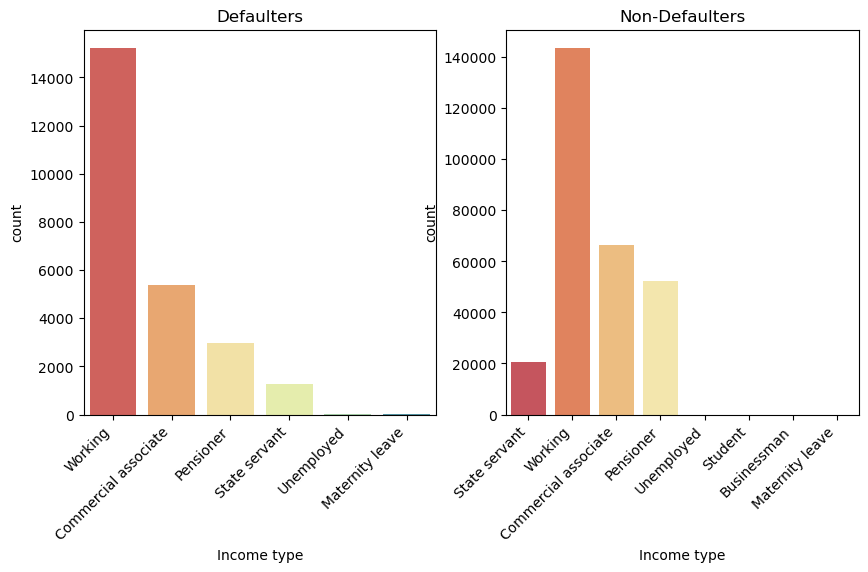

In [50]:
# Defaulters and non-defaulters on the basis of Income type
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Defaulters')
Df = sns.countplot(x='NAME_INCOME_TYPE',data=df_1, palette='Spectral')
Df.set(xlabel='Income type')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
Df = sns.countplot(x='NAME_INCOME_TYPE',data=df_0, palette='Spectral')
Df.set(xlabel='Income type')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

**Analysis**
1. Defaulters: As per the analysis `'Working'` people are facing most difficulty in the payment.
2. Non-Defaulters: Most higher percentage of Non-Defaulter is also a `'Working'` Segment.

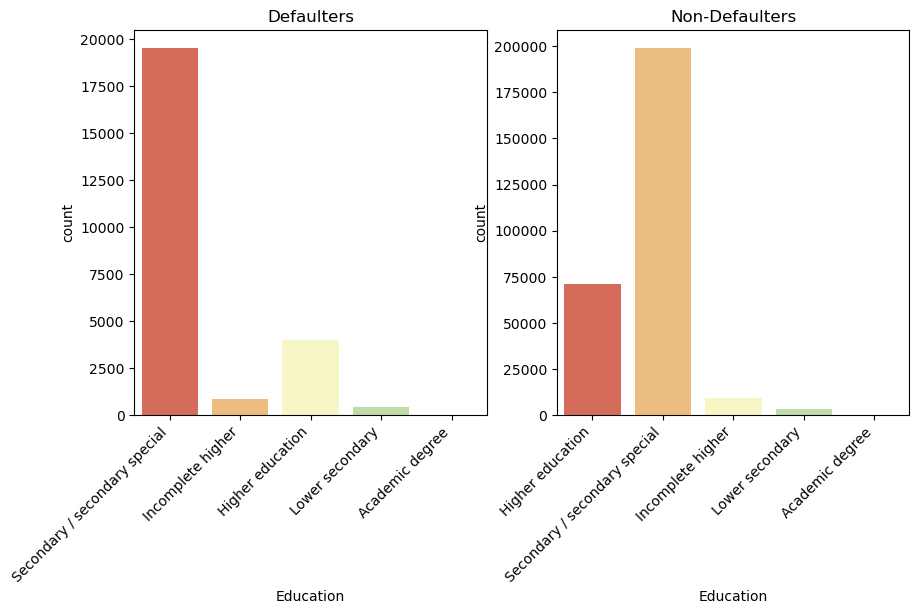

In [51]:
# Defaulters and non-defaulters on the basis of Education
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Defaulters')
Df = sns.countplot(x='NAME_EDUCATION_TYPE',data=df_1, palette='Spectral')
Df.set(xlabel='Education')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
Df = sns.countplot(x='NAME_EDUCATION_TYPE',data=df_0, palette='Spectral')
Df.set(xlabel='Education')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

**Analysis**

1. Defaulters: As per the analysis `'Secondry/Secondry Special'` people are facing most difficulty in the payment.
2. Non-Defaulters: Most higher percentage of Non-Defaulter is also a `'Secondry/Secondry Special'` Segment.

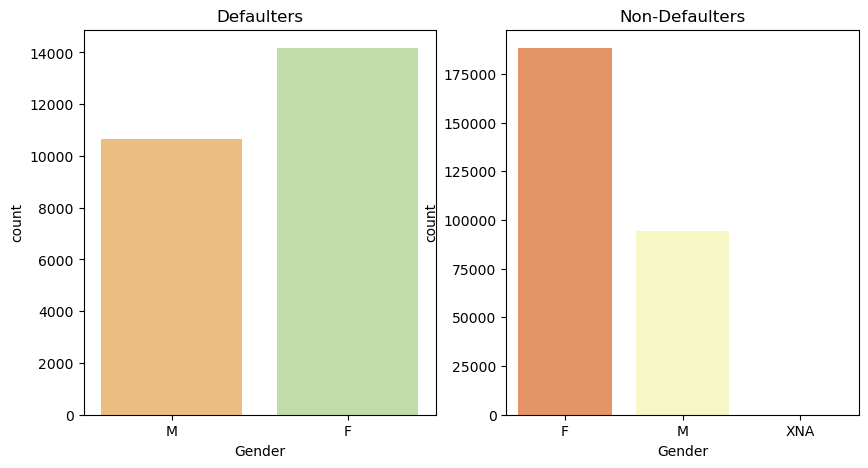

In [52]:
# Defaulters and non-defaulters on the basis of Gender
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Defaulters')
Df = sns.countplot(x='CODE_GENDER',data=df_1, palette='Spectral')
Df.set(xlabel='Gender')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
Df = sns.countplot(x='CODE_GENDER',data=df_0, palette='Spectral')
Df.set(xlabel='Gender')

plt.show()

**Analysis**

1. Defaulters: As per the analysis `'F'` Females are facing most difficulty in the payment.
2. Non-Defaulters: Most higher percentage of Non-Defaulter is also a `'F'` Segment.

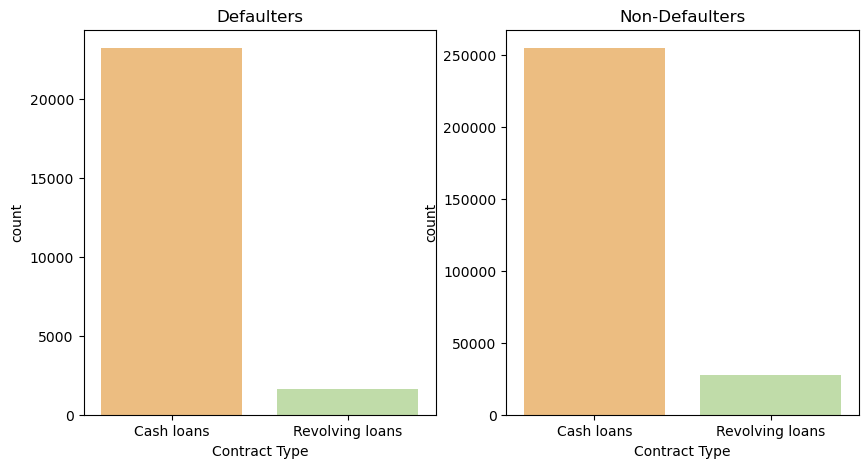

In [53]:
# Defaulters and non-defaulters on the basis of Contract Type
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Defaulters')
Df = sns.countplot(x='NAME_CONTRACT_TYPE',data=df_1, palette='Spectral')
Df.set(xlabel='Contract Type')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
Df = sns.countplot(x='NAME_CONTRACT_TYPE',data=df_0, palette='Spectral')
Df.set(xlabel='Contract Type')

plt.show()

**Analysis**

1. Defaulters: As per the analysis people with `Cash Loans` are facing most difficulty in the payment.
2. Non-Defaulters: Most higher percentage of Non-Defaulter is also a `Cash Loans` Segment.

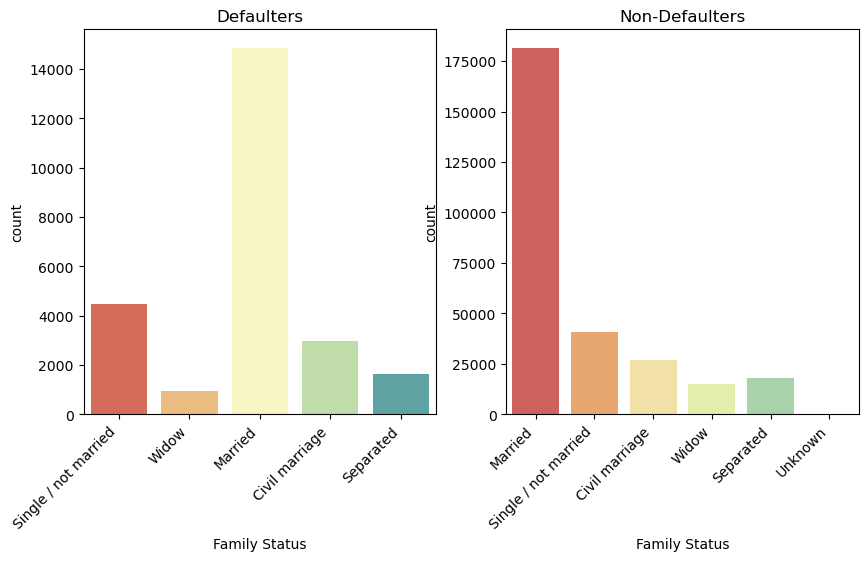

In [54]:
# Defaulters and non-defaulters on the basis of Family Status
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Defaulters')
Df = sns.countplot(x='NAME_FAMILY_STATUS',data=df_1, palette='Spectral')
Df.set(xlabel='Family Status')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
Df = sns.countplot(x='NAME_FAMILY_STATUS',data=df_0, palette='Spectral')
Df.set(xlabel='Family Status')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

**Analysis**

1. Defaulters: As per the analysis people with `Married` status are facing most difficulty in the payment.
2. Non-Defaulters: Most higher percentage of Non-Defaulter is also a `Married` Segment.

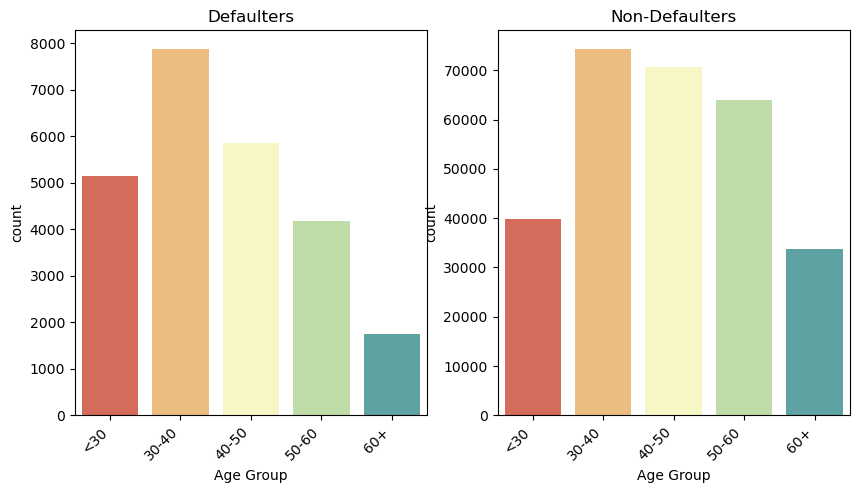

In [55]:
# Defaulters and non-defaulters on the basis of AGE_GROUP
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Defaulters')
Df = sns.countplot(x='AGE_GROUP',data=df_1, palette='Spectral')
Df.set(xlabel='Age Group')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
Df = sns.countplot(x='AGE_GROUP',data=df_0, palette='Spectral')
Df.set(xlabel='Age Group')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

**Analysis**

1. Defaulters: As per the analysis people with age `30-40` are facing most difficulty in the payment.
2. Non-Defaulters: Most higher percentage of Non-Defaulter is also a `30-40` Segment, but age group of `40-50` and `50-60` are                      also paying the amounts on time.

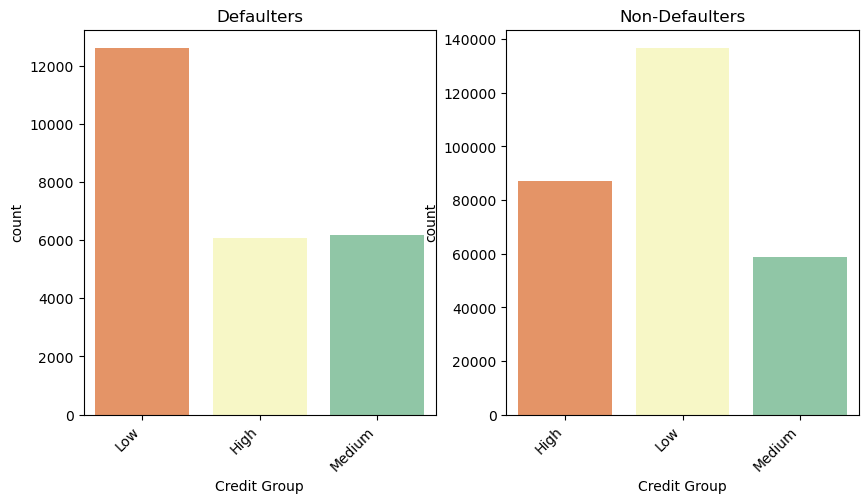

In [56]:
# Defaulters and non-defaulters on the basis of CREDIT_GROUP
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Defaulters')
Df = sns.countplot(x='CREDIT_GROUP',data=df_1, palette='Spectral')
Df.set(xlabel='Credit Group')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
Df = sns.countplot(x='CREDIT_GROUP',data=df_0, palette='Spectral')
Df.set(xlabel='Credit Group')
template = Df.set_xticklabels(Df.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

**Analysis**

1. Defaulters: As per the analysis people with age `Low` income are facing most difficulty in the payment.
2. Non-Defaulters: But also the people who are paying on time belongs to the `Low` income group.

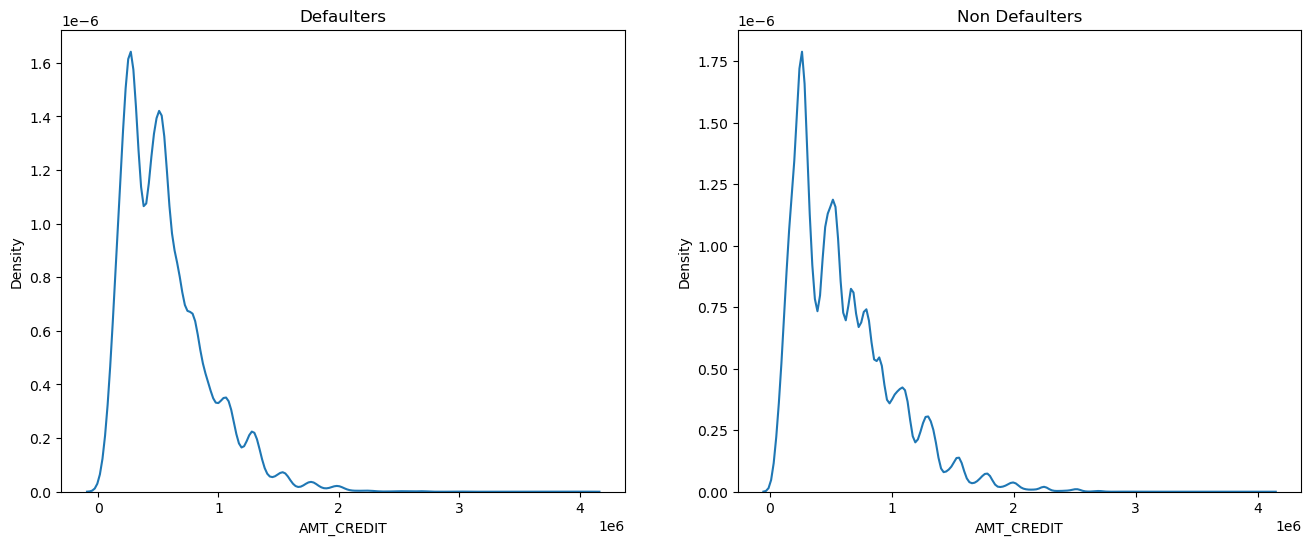

In [57]:
# Defaulters and non-defaulters on the basis of AMT_CREDIT

plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_0['AMT_CREDIT'],hist=False)

plt.show()

**Analysis**

1. Defaulters: The lesser the amount of loan the more chance of being defaulter, here the spike is till 500000.
2. Non-Defaulters: Same goes here as well the lesser the amount of loan, more chances of being non-defaulter.

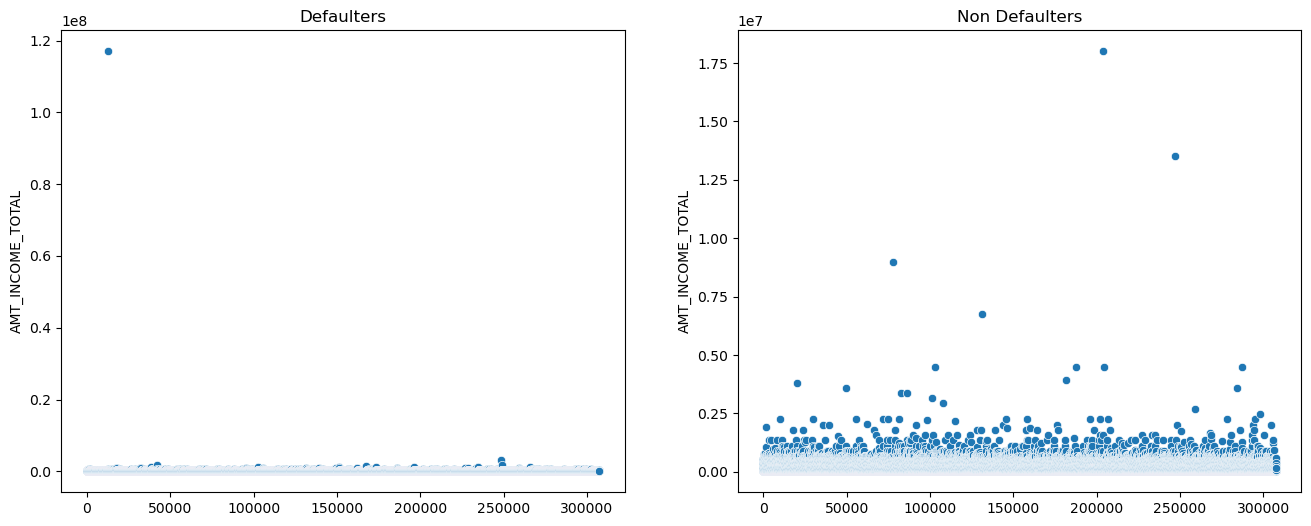

In [58]:
# Defaulters and Non-Defaulters on the basis of their Total Income
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.scatterplot(df_1['AMT_INCOME_TOTAL'], palette='Spectral')
Df.set(xlabel='AMT_INCOME_TOTAL')

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.scatterplot(df_0['AMT_INCOME_TOTAL'], palette='Spectral')
Df.set(xlabel='AMT_INCOME_TOTAL')

plt.show()

**Analysis**

1. Defaulters: As per observation most of the people with low income are defaulters.
2. Non-Defaulters: Same goes here as well the lesser the amount of income, more chances of being non-defaulters.

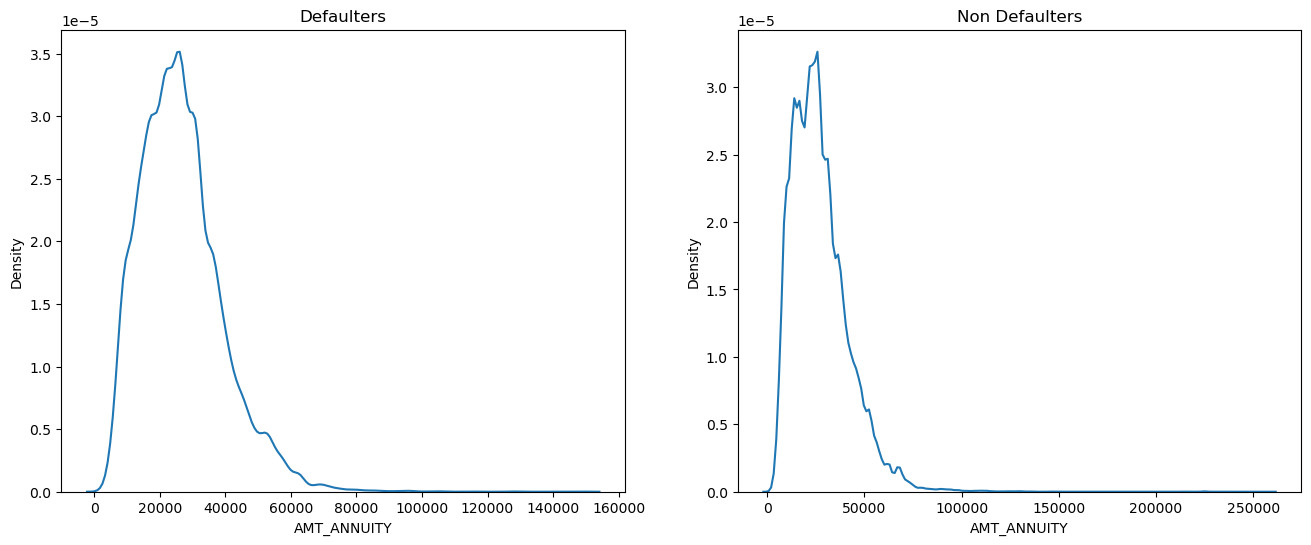

In [59]:
# Defaulters and Non-Defaulters on the basis of their Annuity amount
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_0['AMT_ANNUITY'],hist=False)

plt.show()

**Analysis**

1. Defaulters: As per observation most of the people with annuity amount between 2000-4000 makes more defaults.
2. Non-Defaulters: Where as the people with annuity amount of 0-5000 are not facing any difficulties in the payment.

# Bivariate Analysis

In [60]:
# Creating a list for correlation analysis
col_corr = ['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','REGION_RATING_CLIENT','AGE']
col_corr

['AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT',
 'AGE']

In [61]:
# creting the numerical columns dataframe for defaulters
df_corr_1 = df_1[col_corr]
df_corr_1.head()

,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_RATING_CLIENT,AGE
0,406597.5,24700.5,202500.0,351000.0,2,26
26,979992.0,27076.5,112500.0,702000.0,3,52
40,1193580.0,35028.0,202500.0,855000.0,2,48
42,288873.0,16258.5,135000.0,238500.0,3,37
81,252000.0,14593.5,81000.0,252000.0,2,68


In [62]:
df_corr_1.corr()

,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_RATING_CLIENT,AGE
AMT_CREDIT,1.000000,0.752195,0.038131,0.983103,-0.059193,0.135044
AMT_ANNUITY,0.752195,1.000000,0.046421,0.752699,-0.073784,0.013984
AMT_INCOME_TOTAL,0.038131,0.046421,1.000000,0.037583,-0.021486,-0.003158
AMT_GOODS_PRICE,0.983103,0.752699,0.037583,1.000000,-0.066390,0.135578
REGION_RATING_CLIENT,-0.059193,-0.073784,-0.021486,-0.066390,1.000000,-0.033583
AGE,0.135044,0.013984,-0.003158,0.135578,-0.033583,1.000000


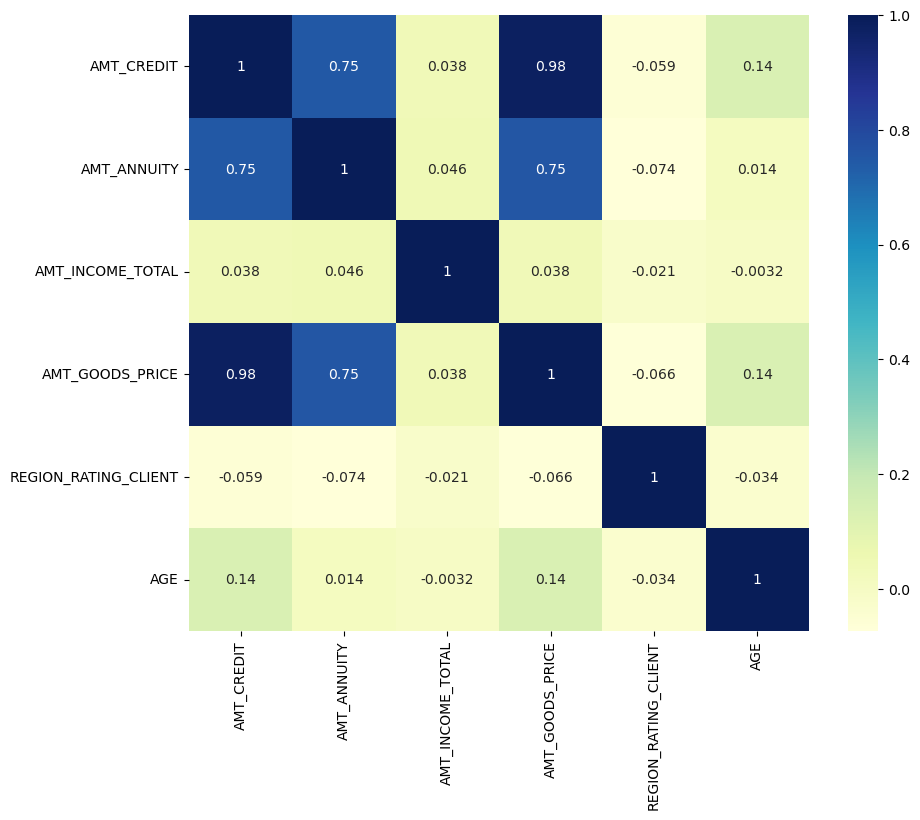

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_1.corr(), annot=True, cmap='YlGnBu')
plt.show()

**Analysis (Highly Correlted Columns)**
1. 'AMT_CREDIT' & 'AMT_ANNUITY'are highly correlated (0.74)
2. 'AMT_ANNUITY' is highly correlated with 'AMT_CREDIT' & 'AMT_GOODS_PRICE' (0.75 each)
3. 'AMT_GOODS_PRICE' is highly correlated with 'AMT_CREDIT' (0.98) & 'AMT_ANNUITY' (0.75)

In [64]:
# creting the numerical columns dataframe for non-defaulters
df_corr_0 = df_0[col_corr]
df_corr_0.head()

,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_RATING_CLIENT,AGE
1,1293502.5,35698.5,270000.0,1129500.0,1,46
2,135000.0,6750.0,67500.0,135000.0,2,53
3,312682.5,29686.5,135000.0,297000.0,2,53
4,513000.0,21865.5,121500.0,513000.0,2,55
5,490495.5,27517.5,99000.0,454500.0,2,47


In [65]:
df_corr_0.corr()

,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_RATING_CLIENT,AGE
AMT_CREDIT,1.000000,0.771309,0.342799,0.987250,-0.103337,0.047350
AMT_ANNUITY,0.771309,1.000000,0.418953,0.776686,-0.132128,-0.012286
AMT_INCOME_TOTAL,0.342799,0.418953,1.000000,0.349462,-0.186573,-0.062542
AMT_GOODS_PRICE,0.987250,0.776686,0.349462,1.000000,-0.104382,0.044534
REGION_RATING_CLIENT,-0.103337,-0.132128,-0.186573,-0.104382,1.000000,-0.002412
AGE,0.047350,-0.012286,-0.062542,0.044534,-0.002412,1.000000


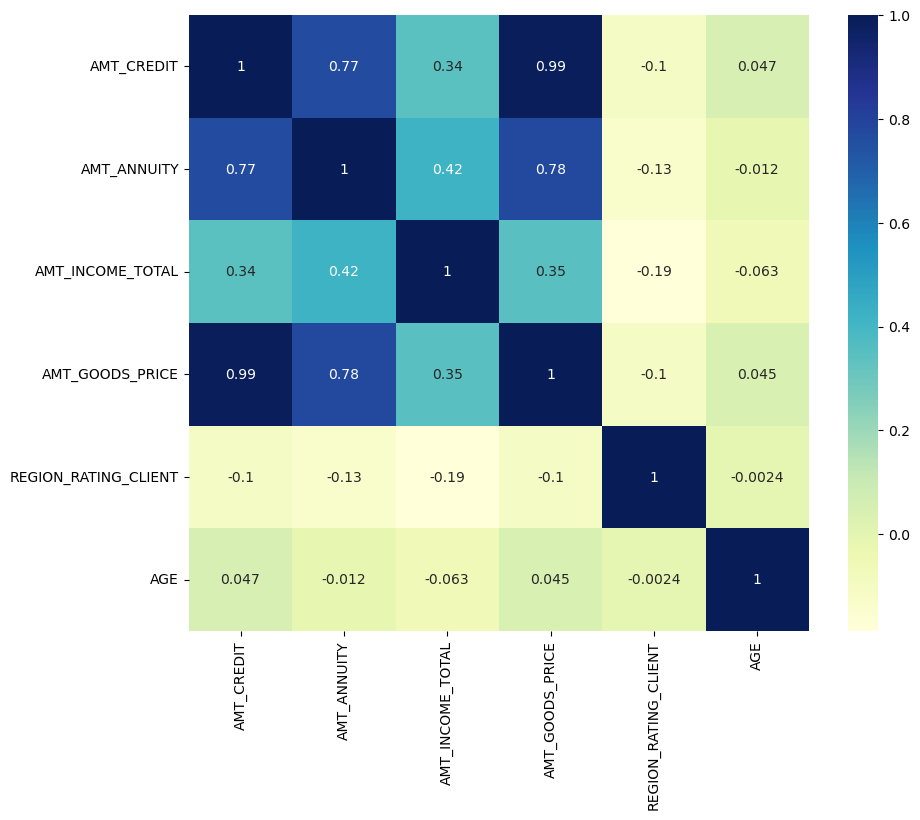

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_0.corr(), annot=True, cmap='YlGnBu')
plt.show()

**Analysis (Highly Correlted Columns)**
1. 'AMT_CREDIT' & 'AMT_GOODS_PRICE' (0.99) are highly correlated 
2. 'AMT_ANNUITY' is highly correlated with 'AMT_CREDIT'(0.77) & 'AMT_GOODS_PRICE' (0.78)
3. 'AMT_GOODS_PRICE' is highly correlated with 'AMT_CREDIT' (0.99) & 'AMT_ANNUITY' (0.78)

**Conclusion :** Both defaulter and non-defaulter are highly correlated with same variables.

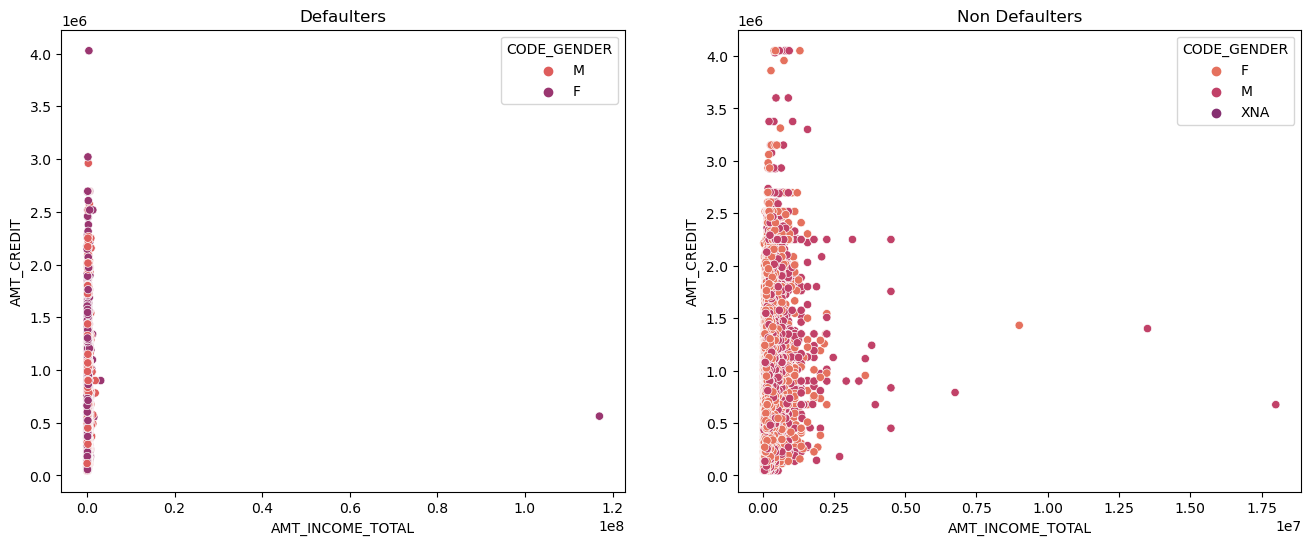

In [67]:
# Credit analysis of loan on the basis of income based on gender:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue='CODE_GENDER', data=df_1, palette='flare')
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue = 'CODE_GENDER', data=df_0, palette='flare')
plt.title('Non Defaulters')

plt.show()

**Analysis**
1. Defaulters: As we can observe there is no such pattern found in the data.
2. Non-Defaulters: Here we can see as that as the income increases, amount of loan also increased.

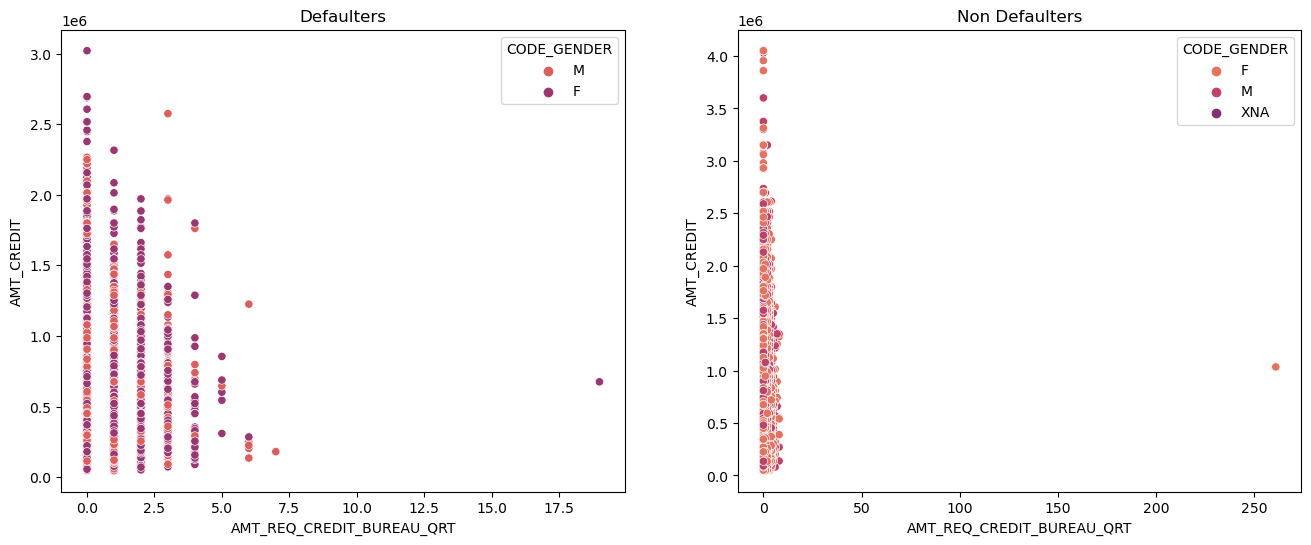

In [68]:
# Credit amount of the loan on the basis of No. of inquires for credit score checks 
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT',y='AMT_CREDIT',hue='CODE_GENDER', data=df_1, palette='flare')
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT',y='AMT_CREDIT',hue = 'CODE_GENDER', data=df_0, palette='flare')
plt.title('Non Defaulters')

plt.show()

**Analysis**

We can observe here in both the cases of Defaulters and Non Defaulter more the no. of inquiries less the credit amount.

In [69]:
# Creating a list of catagorical columns
cat_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','NAME_INCOME_TYPE','AGE_GROUP','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
           'NAME_HOUSING_TYPE', 'FLAG_OWN_CAR','FLAG_OWN_REALTY']

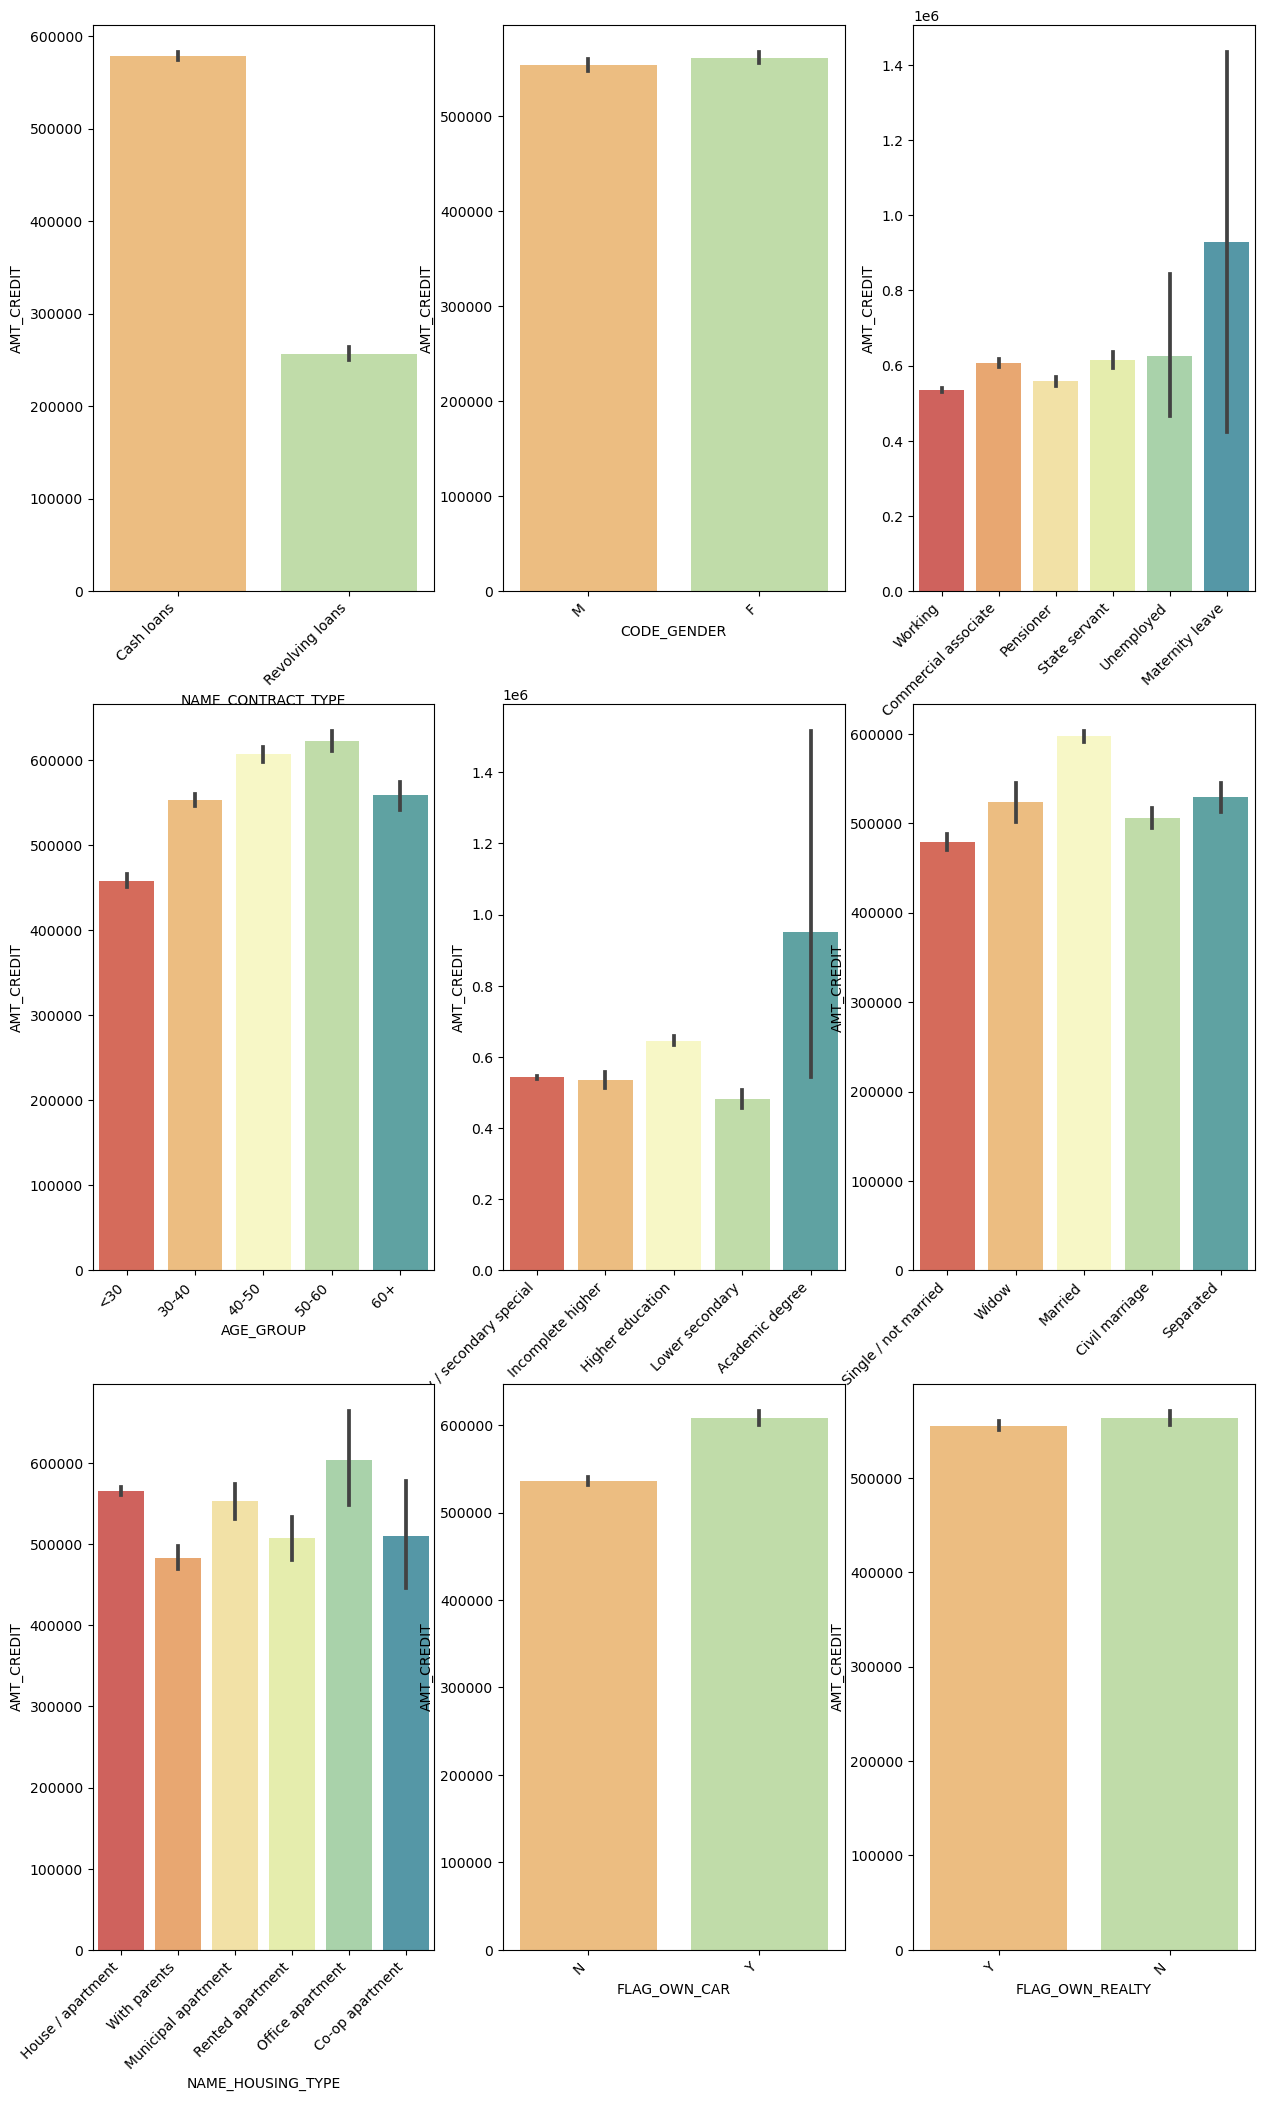

In [70]:
# Impact of all the categories on credit amount (Defaulters)
plt.figure(figsize=(15,25))
k=0
for cat in cat_col:
    k=k+1
    i = plt.subplot(3,3,k)
    sns.barplot(x=cat, y='AMT_CREDIT', data=df_1, palette='Spectral')
    template = i.set_xticklabels(i.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

**Analysis (Defaulters)**

1. Credit amount of loan is low for revolving loans i.e. more defaults are happening in cash loans.
2. In the `CODE_GENDER` there is no major difference but females got slightly more credit amount.
3. In the `NAME_INCOME_TYPE` people with maternity leaves got more credit.
4. In the `AGE_GROUP` younger people got lesser amount of loan.
5. In `NAME_EDUCATION_TYPE` people with Academic degree got more amount of loan.
6. Married people got more loan in `NAME_FAMILY_STATUS`.
7. People with office apartment in `NAME_HOUSING_TYPE` got more credit amount.
8. clients with own car and no realty got more credit amount.

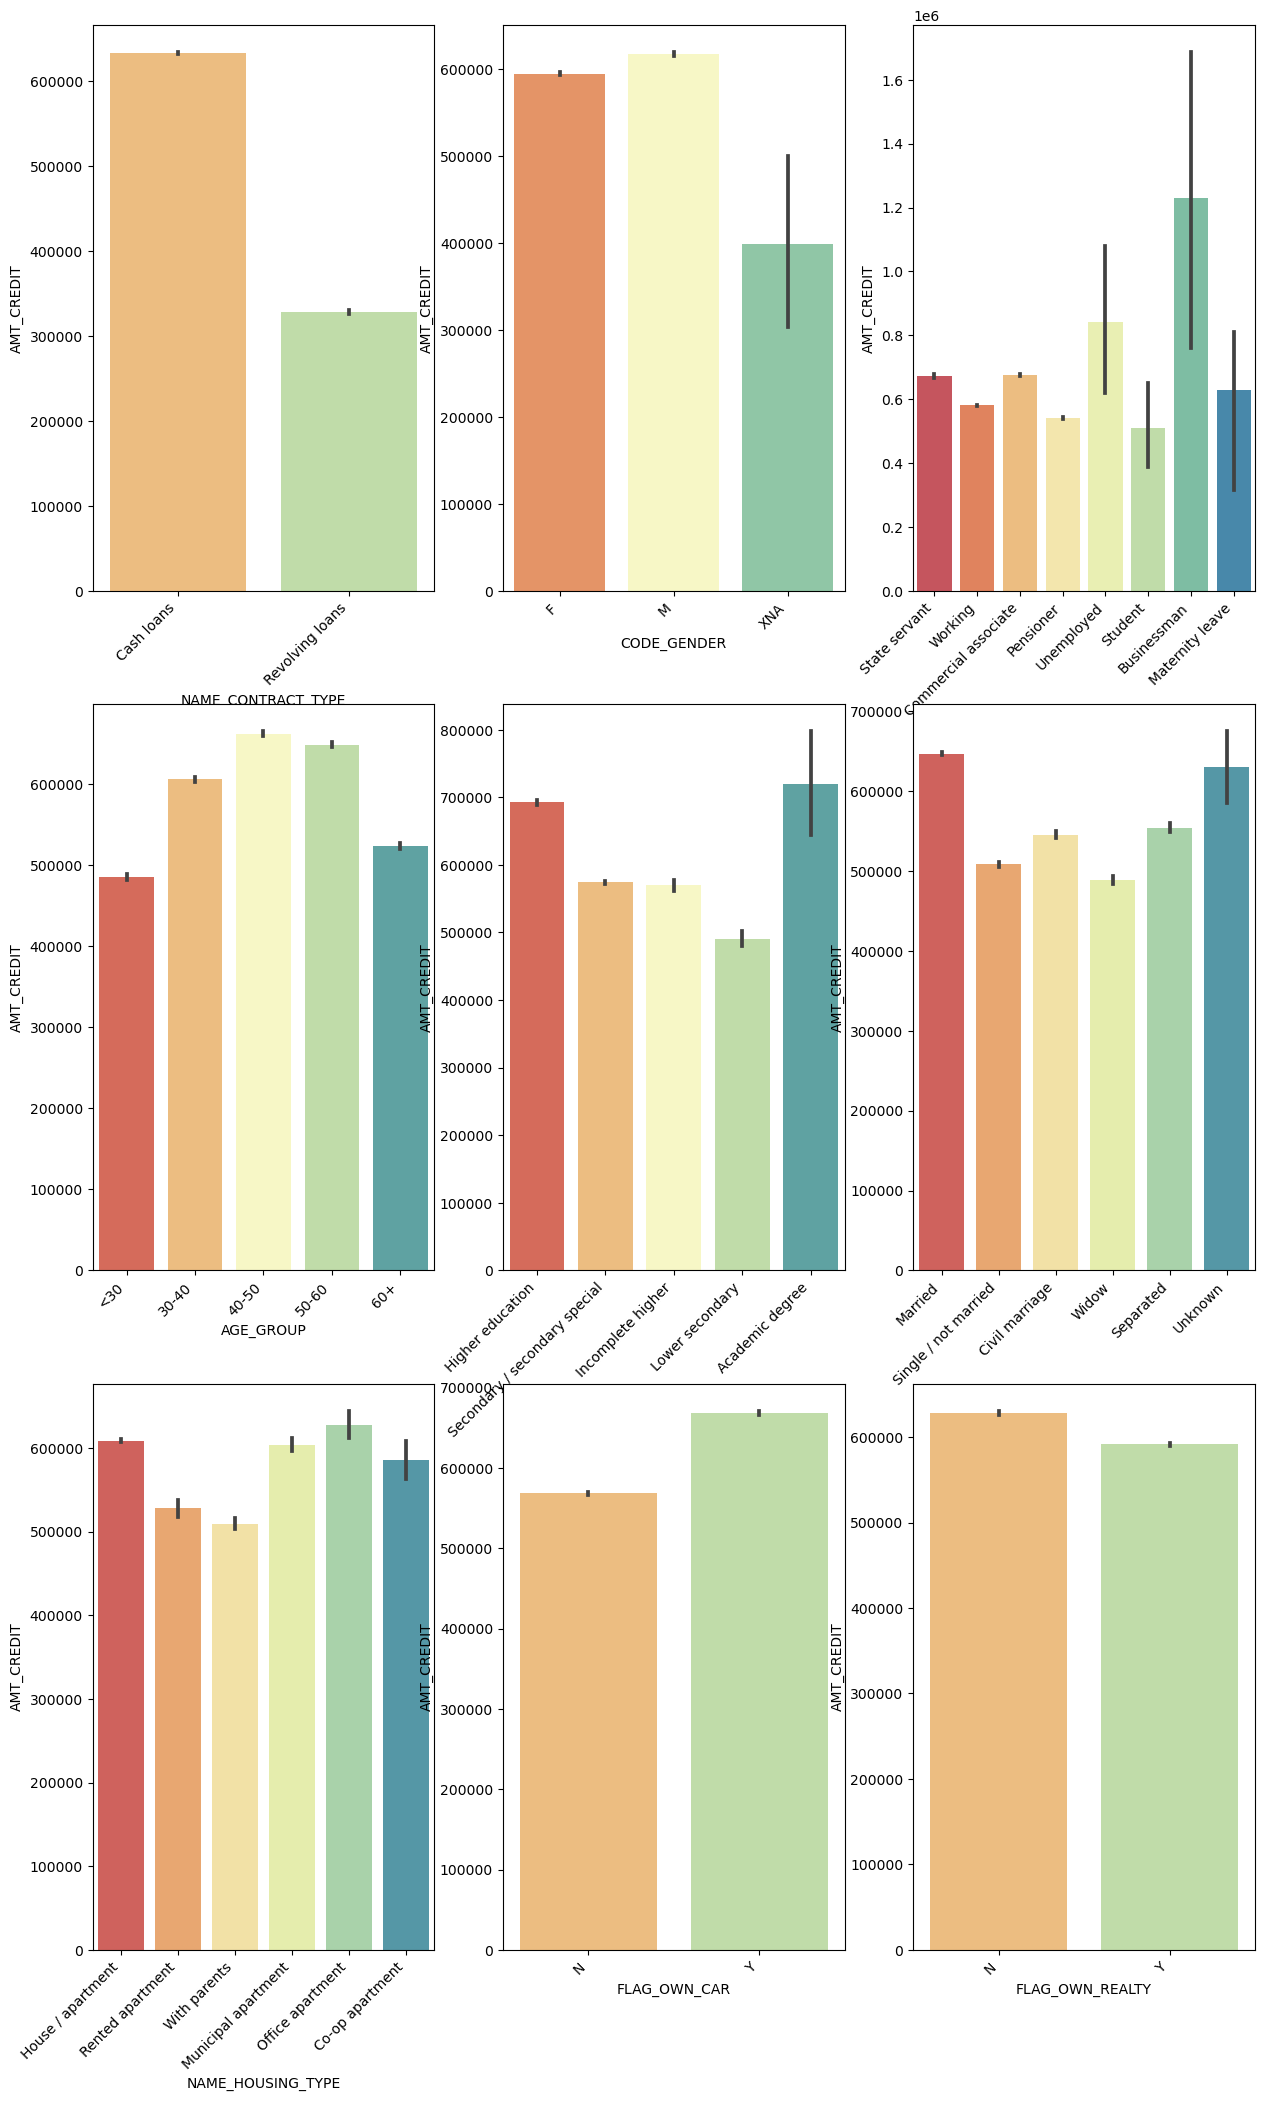

In [71]:
# Impact of all the categories on credit amount (Non-Defaulters)
plt.figure(figsize=(15,25))
k=0
for cat in cat_col:
    k=k+1
    i = plt.subplot(3,3,k)
    sns.barplot(x=cat, y='AMT_CREDIT', data=df_0, palette='Spectral')
    template = i.set_xticklabels(i.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

**Analysis (Non-Defaulters)**

1. Credit amount of loan is low for revolving loans.
2. In the `CODE_GENDER` there is no major difference but males got slightly more credit amount.
3. In the `NAME_INCOME_TYPE` businessman got more credit.
4. In the `AGE_GROUP` younger people got lesser amount of loan and people with the age of '40-50' got the highest credit amount.
5. In `NAME_EDUCATION_TYPE` people with Academic degree got more amount of loan.
6. Married people got more loan in `NAME_FAMILY_STATUS`.
7. People with office apartment in `NAME_HOUSING_TYPE` got more credit amount.
8. clients with own car and no realty got more credit amount.

# Previous Application Data

In [72]:
#reading the dataset of 'previous_application.csv' in df_pre.
df_pre = pd.read_csv('previous_application.csv')
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_pre.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [74]:
#checking the shape of data (rows, columns) in the data
df_pre.shape

(1670214, 37)

In [75]:
#checking the columns info in data
df_pre.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [76]:
#checking the statstical data of dataframe
df_pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Missing Value Identification & Treatment

In [77]:
#checking the missing values percentage in the data
round((df_pre.isnull().sum()/len(df_pre.index)*100),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [78]:
# Replacing the XNA and XAP values with NaN's as it seems to be filled as blank at the time of submission
df_pre.replace('XNA', np.nan, inplace=True)
df_pre.replace('XAP', np.nan, inplace=True)

In [79]:
# List of missing values having more than 30% missing values
cut_off=30
cols_to_drop=list(df_pre.columns[100*df_pre.isnull().mean()>cut_off])
print(cols_to_drop)

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [80]:
# Dropping the columns having more than 30% missing values
df_pre=df_pre.drop(cols_to_drop,axis=1)

In [81]:
df_pre.shape

(1670214, 19)

In [82]:
df_pre.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [83]:
# Removing the columns which are not seems to be relevant for analysing
irrelevent_col = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 
                  'NFLAG_LAST_APPL_IN_DAY']

In [84]:
df_pre = df_pre.drop(irrelevent_col, axis=1)

In [85]:
df_pre.shape

(1670214, 15)

In [86]:
#checking the missing values percentage in the data
round((df_pre.isnull().sum()/len(df_pre.index)*100),2)

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_TYPE       0.02
AMT_ANNUITY             22.29
AMT_APPLICATION          0.00
AMT_CREDIT               0.00
AMT_GOODS_PRICE         23.08
NAME_CONTRACT_STATUS     0.00
DAYS_DECISION            0.00
NAME_CLIENT_TYPE         0.12
NAME_PORTFOLIO          22.29
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
CNT_PAYMENT             22.29
PRODUCT_COMBINATION      0.02
dtype: float64

In [87]:
# calculating the lenght of the missing rows in 'AMT_ANNUITY', 'CNT_PAYMENT', & 'AMT_GOODS_PRICE'
len(df_pre[np.isnan(df_pre['AMT_ANNUITY']) & np.isnan(df_pre['CNT_PAYMENT']) & np.isnan(df_pre['AMT_GOODS_PRICE'])])

333855

As we have a total of 1670214 of total rows and 333855 is just 0.19th part of data so if we drop this rows this will not much effect the analysis.

In [88]:
df_pre = df_pre[(~(np.isnan(df_pre['AMT_ANNUITY']) & np.isnan(df_pre['CNT_PAYMENT']) & np.isnan(df_pre['AMT_GOODS_PRICE'])))]

In [89]:
df_pre.shape

(1336359, 15)

In [90]:
#checking the missing values percentage in the data
round((df_pre.isnull().sum()/len(df_pre.index)*100),2)

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             2.87
PRODUCT_COMBINATION     0.00
dtype: float64

In [91]:
# calculating the rows in which 'AMT_ANNUITY' is set to empty
len(df_pre[np.isnan(df_pre['AMT_ANNUITY'])])

38380

In [92]:
# As the no. of rows are less we can delete these rows
df_pre = df_pre[(~(np.isnan(df_pre['AMT_ANNUITY'])))]

In [93]:
df_pre.shape

(1297979, 15)

In [94]:
#checking the missing values percentage in the data
(round(100*(df_pre.isnull().sum()/len(df_pre.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [95]:
df_pre.shape

(1297979, 15)

In [96]:
# Data Imbalance
list0 = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

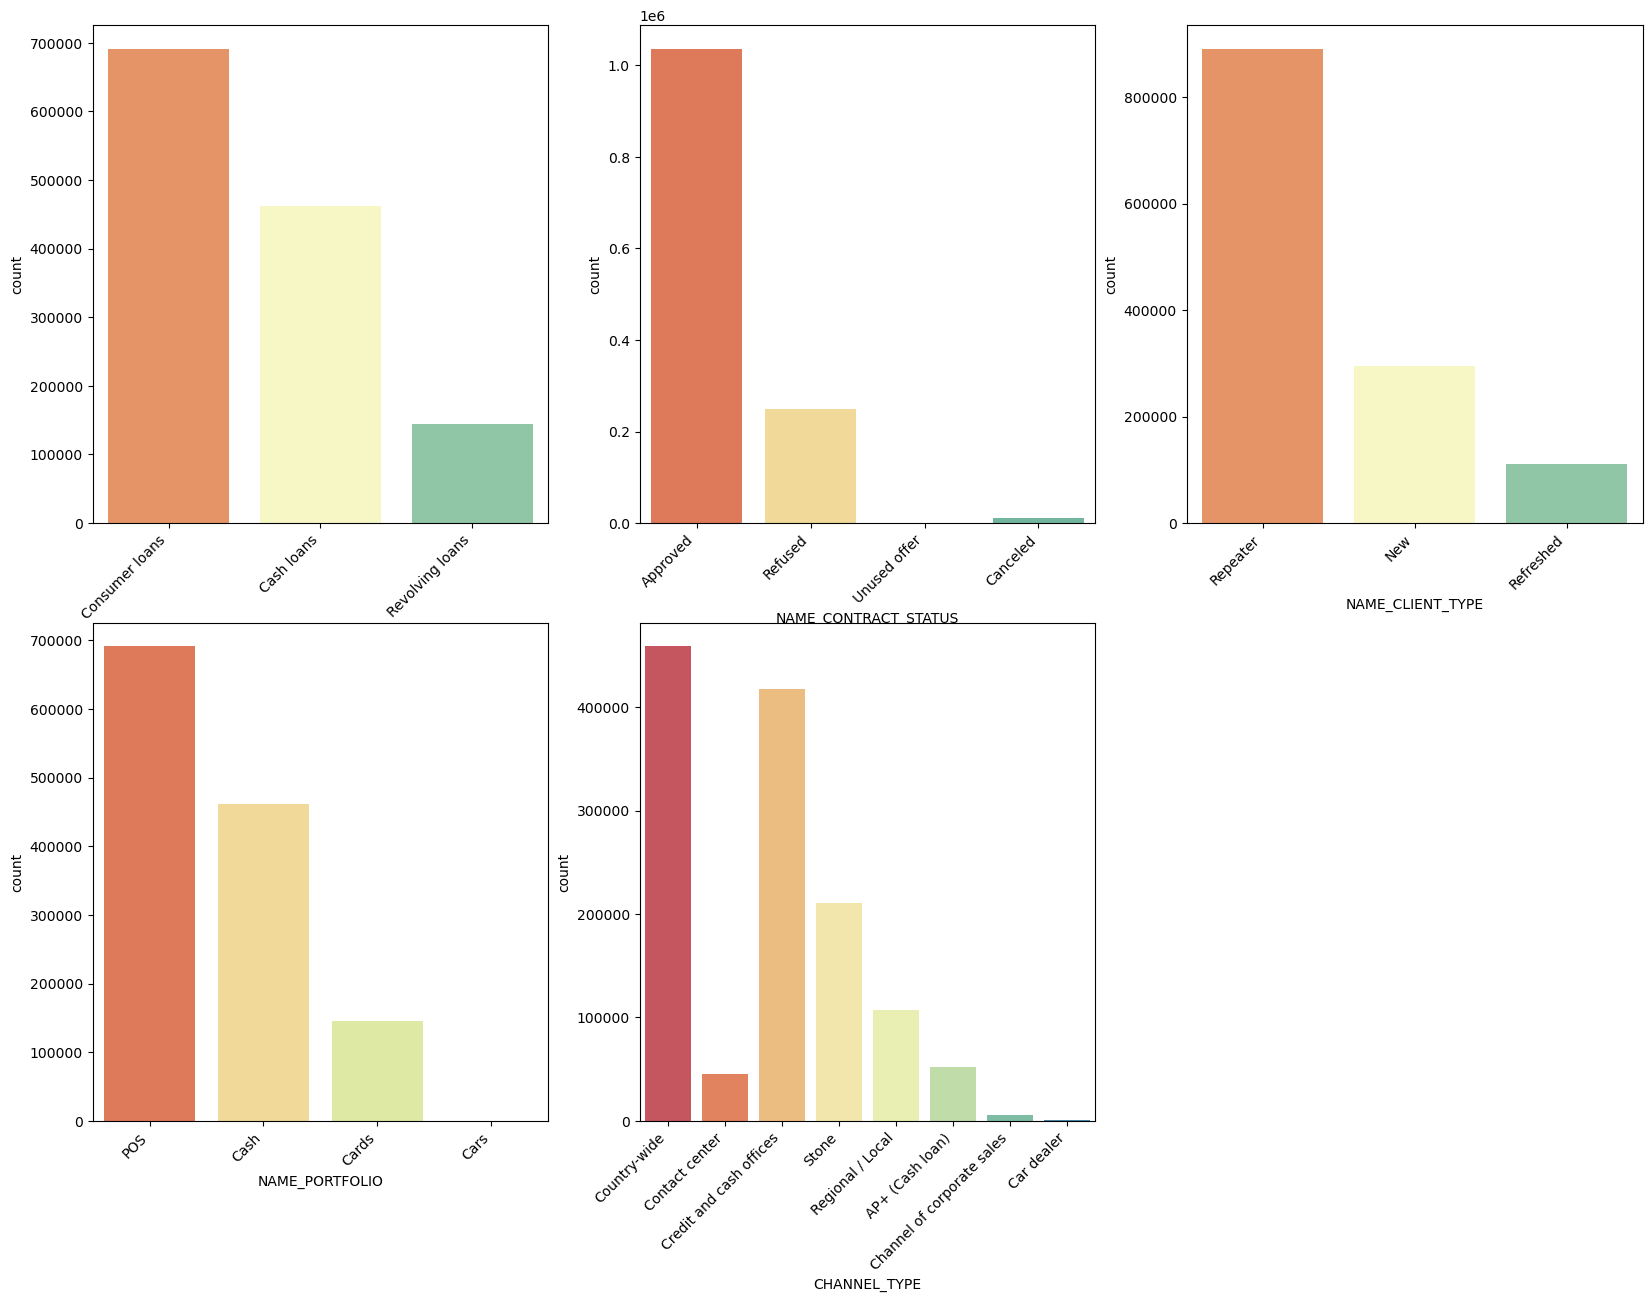

In [97]:
k=0
plt.figure(figsize=(20,22))
for col in list0:    
    k=k+1
    plt.subplot(3, 3,k)    
    ax = sns.countplot(x = col, data=df_pre, palette='Spectral')
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

**Analysis**

1. NAME_CONTRACT_TYPE - There are very less amount of revolving loans.
2. NAME_CONTRACT_STATUS - There is no amount of unused and canceled loans.
3. NAME_CLIENT_TYPE - There were very few refreshed or new applicants.
4. NAME_PORTFOLIO - There are very few applicants for cash and cards.
5. CHANNEL_TYPE - Otherthan `Country-wide`, `Credit and Cash Offices`, and `Stone` there is very less amount of other channels.

In [98]:
# Converting the column of 'DAYS_DECISION' to 'MONTH_DECISION' for better analysing
df_pre['MONTH_DECISION'] = abs(df_pre['DAYS_DECISION']//30)

In [99]:
# dropping the days decision column
df_pre = df_pre.drop(['DAYS_DECISION'],axis=1)

In [100]:
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,Repeater,POS,Country-wide,35,12.0,POS mobile with interest,3
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved,Repeater,Cash,Contact center,-1,36.0,Cash X-Sell: low,6
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: high,11
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: middle,18
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused,Repeater,Cash,Credit and cash offices,-1,24.0,Cash Street: high,27


In [101]:
df_pre.shape

(1297979, 15)

# Merging the current application and previous application datasets

In [102]:
# Joining both the datasets
df_merged = pd.merge(left=df, right=df_pre, how='inner', on='SK_ID_CURR')

In [103]:
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,Income_Group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,MONTH_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,<30,Low,High,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,New,POS,Stone,500,24.0,POS other with interest,21
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,School,0.622246,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-50,High,High,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: low,25
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,School,0.622246,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-50,High,High,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,Refreshed,POS,Stone,1400,6.0,POS industry with interest,28
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,School,0.622246,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-50,High,High,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,Refreshed,POS,Country-wide,200,12.0,POS household with interest,79
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,50-60,Low,Low,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Approved,New,POS,Regional / Local,30,4.0,POS mobile without interest,28


In [104]:
#checking the shape of data (rows, columns) in the data
df_merged.shape

(1106483, 69)

In [105]:
#checking the statstical data of dataframe
df_merged.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,SELLERPLACE_AREA,CNT_PAYMENT,MONTH_DECISION
count,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106420e+06,1.105464e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.104897e+06,916520.000000,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,977769.000000,977769.000000,977769.000000,977769.000000,977769.000000,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106483e+06,1.106482e+06,1.061189e+06,1.106483e+06,1.106483e+06,1.106483e+06
mean,2.784618e+05,8.352862e-02,4.116882e-01,1.721340e+05,5.916325e+05,2.703967e+04,5.316600e+05,2.072536e-02,-3.038525e+03,2.158427e+00,2.061699e+00,2.038948e+00,5.118694e-01,0.496419,7.501245e-05,7.382707e-01,7.772374e-05,1.399479e-02,8.790013e-02,2.015395e-04,7.484616e-02,3.203845e-03,5.784092e-05,1.841872e-03,1.807529e-06,1.751496e-03,1.304132e-03,6.398652e-04,5.526520e-03,1.418910e-04,4.129300e-03,3.669284e-04,3.352966e-04,2.331712e-04,0.006184,0.006729,0.037701,0.304932,2.694828,4.508092e+01,1.957777e+02,1.913975e+06,1.583718e+04,2.217407e+05,2.487124e+05,2.312385e+05,3.947952e+02,1.605197e+01,3.517801e+01
std,1.027683e+05,2.766797e-01,7.231569e-01,1.878641e+05,3.883297e+05,1.398304e+04,3.562859e+05,1.324699e-02,1.506086e+03,9.058039e-01,4.957071e-01,4.887721e-01,1.907931e-01,0.195936,8.660652e-03,4.395762e-01,8.815768e-03,1.174689e-01,2.831497e-01,1.419504e-02,2.631431e-01,5.651180e-02,7.605106e-03,4.287751e-02,1.344443e-03,4.181422e-02,3.608923e-02,2.528747e-02,7.413489e-02,1.191096e-02,6.412685e-02,1.915187e-02,1.830804e-02,1.526817e-02,0.081657,0.106455,0.210869,0.996181,2.133474,1.187700e+01,3.893807e+02,5.342254e+05,1.472491e+04,3.160338e+05,3.427351e+05,3.193201e+05,8.694857e+03,1.456677e+01,2.659140e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-7.197000e+03,1.000000e+00,1.000000e+00,1.000000e+00,8.173617e-08,0.000527,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,1.894505e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.676700e+04,2.385000e+05,1.003200e-02,-4.319000e+03,2.000000e+00,2.000000e+00,2.000000e+00,3.900824e-01,0.353988,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,3.500000e+01,3.000000e+00,1.446684e+06,6.257858e+03,4.500000e+04,5.220900e+04,5.130000e+04,-1.000000e+00,6.000000e+00,1.400000e+01
50%,2.789410e+05,0.000000e+00,0.000000e+00,1.5750

In [106]:
# checking all the columns of merged dataframe
df_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT

In [107]:
#checking the columns info in data
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106483 entries, 0 to 1106482
Data columns (total 69 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1106483 non-null  int64   
 1   TARGET                       1106483 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1106483 non-null  object  
 3   CODE_GENDER                  1106483 non-null  object  
 4   FLAG_OWN_CAR                 1106483 non-null  object  
 5   FLAG_OWN_REALTY              1106483 non-null  object  
 6   CNT_CHILDREN                 1106483 non-null  int64   
 7   AMT_INCOME_TOTAL             1106483 non-null  float64 
 8   AMT_CREDIT_x                 1106483 non-null  float64 
 9   AMT_ANNUITY_x                1106420 non-null  float64 
 10  AMT_GOODS_PRICE_x            1105464 non-null  float64 
 11  NAME_INCOME_TYPE             1106483 non-null  object  
 12  NAME_EDUCATION_TYPE         

In [108]:
# Let us create a list for catagorical and numerical data type from new dataframe
object_merged =df_merged.select_dtypes(["category","object"]).columns.to_list()
num_merged =df_merged.select_dtypes(["int","float"]).columns.to_list()

1)


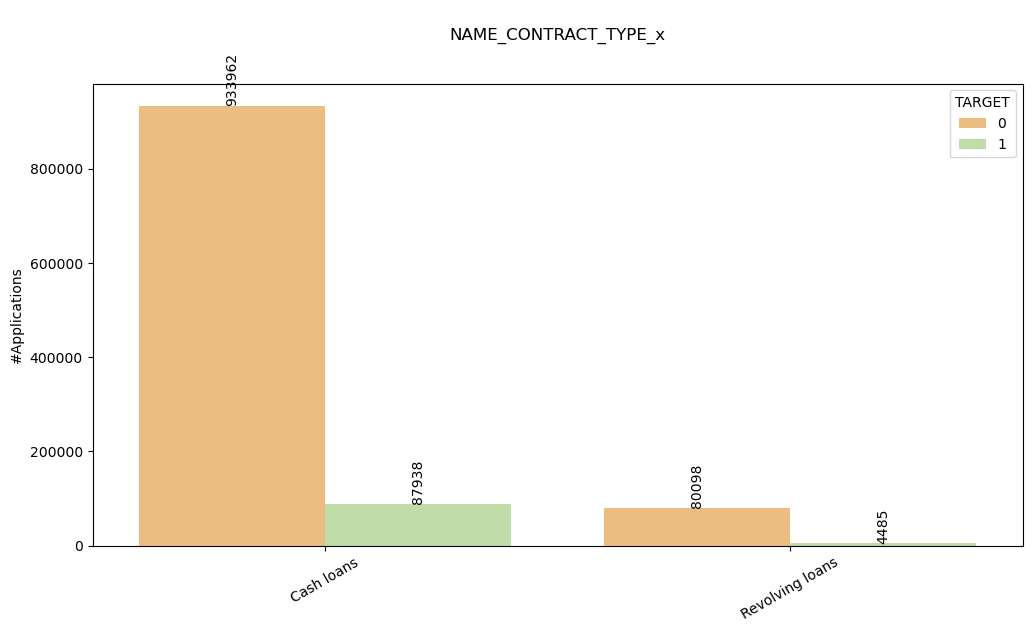

2)


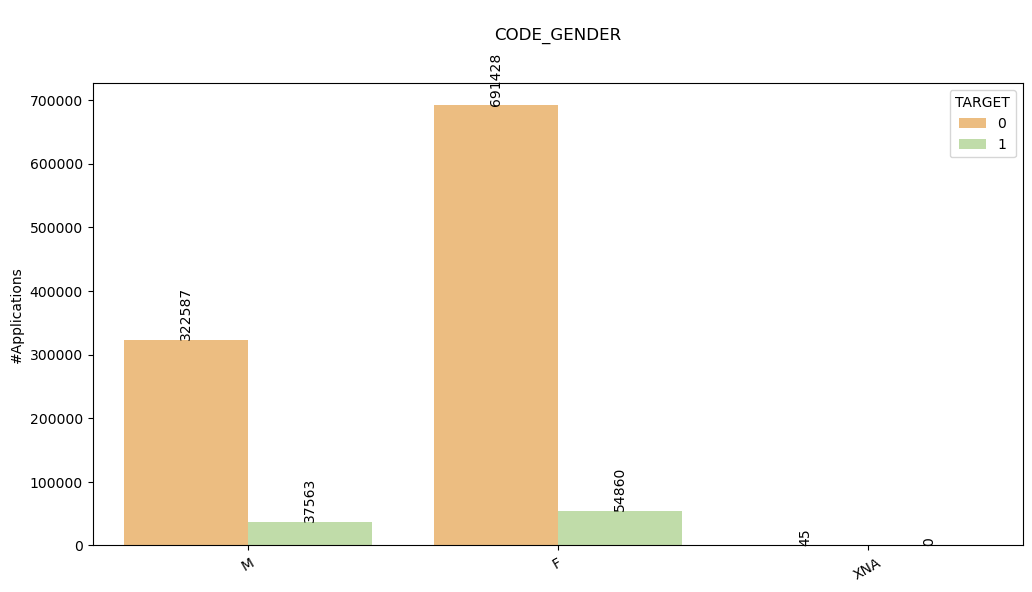

3)


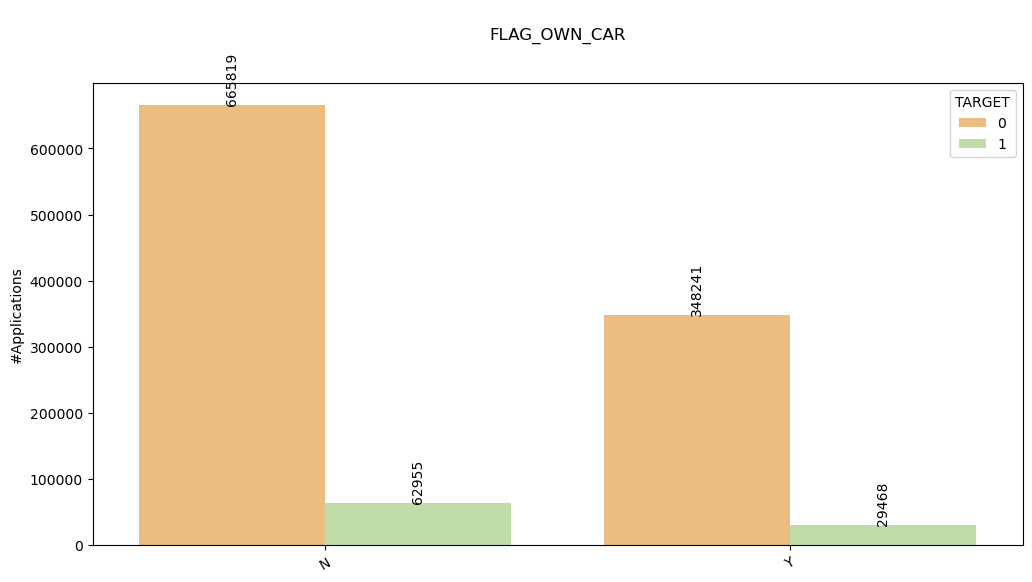

4)


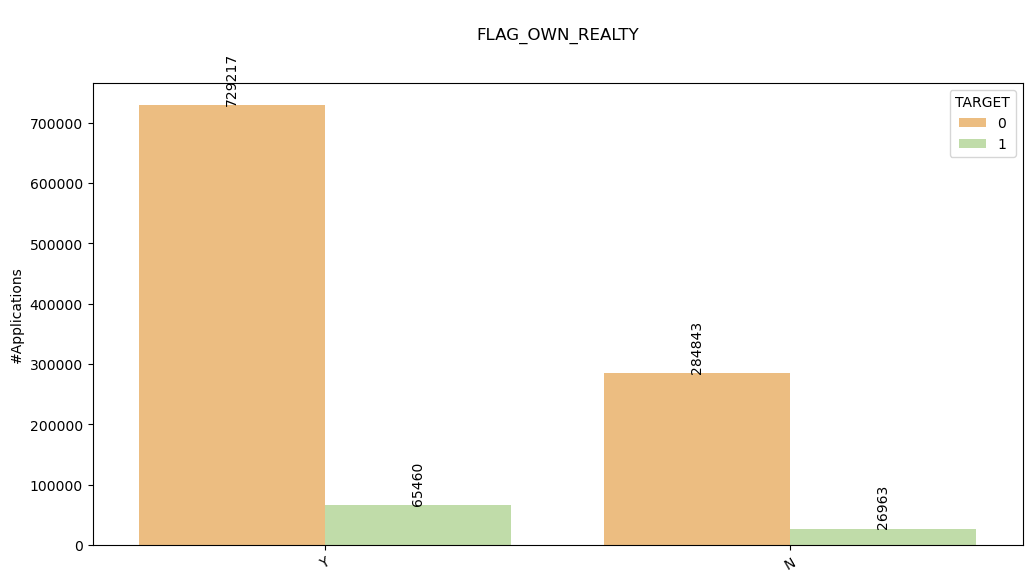

5)


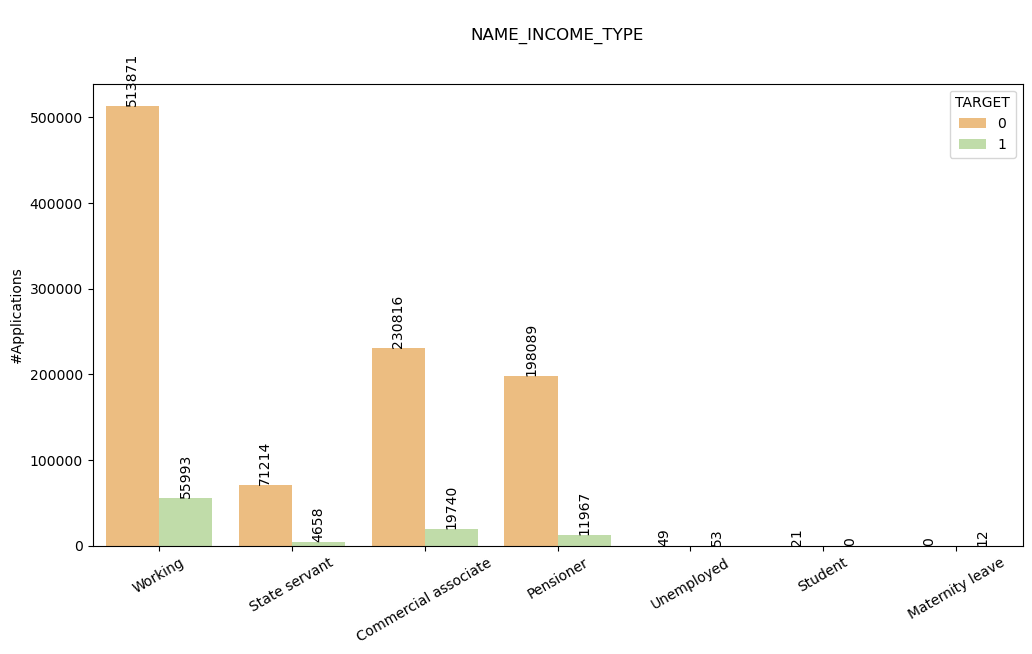

6)


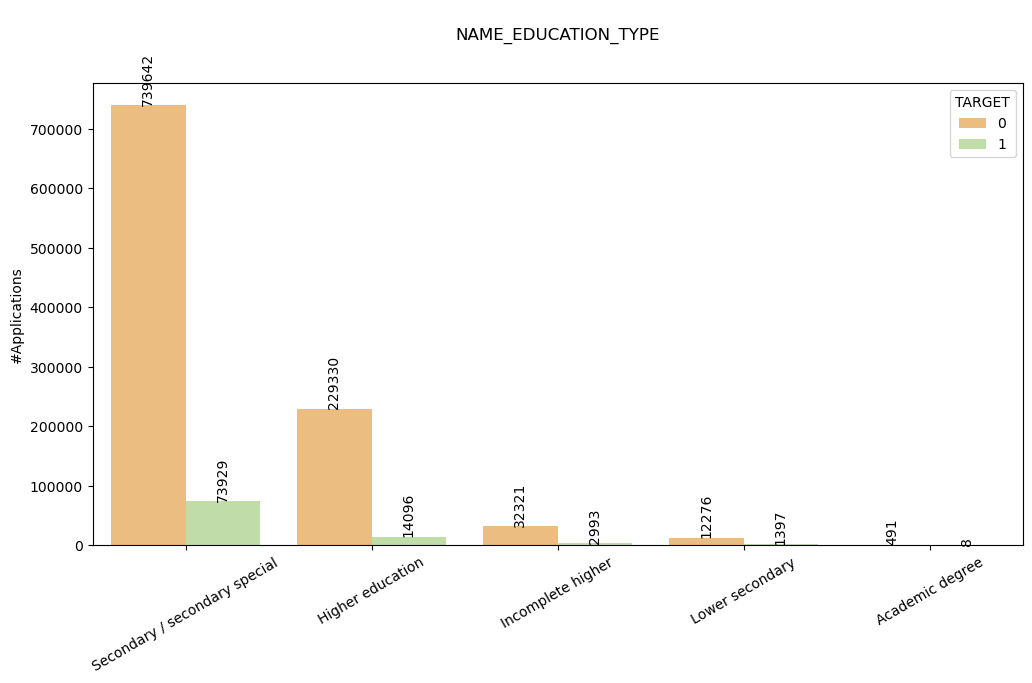

7)


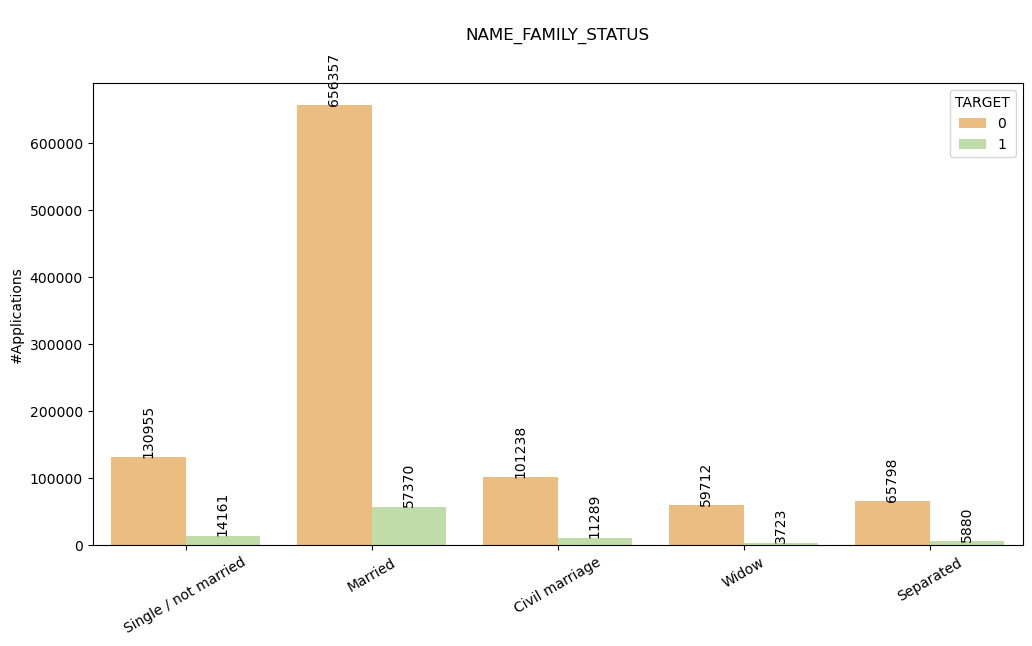

8)


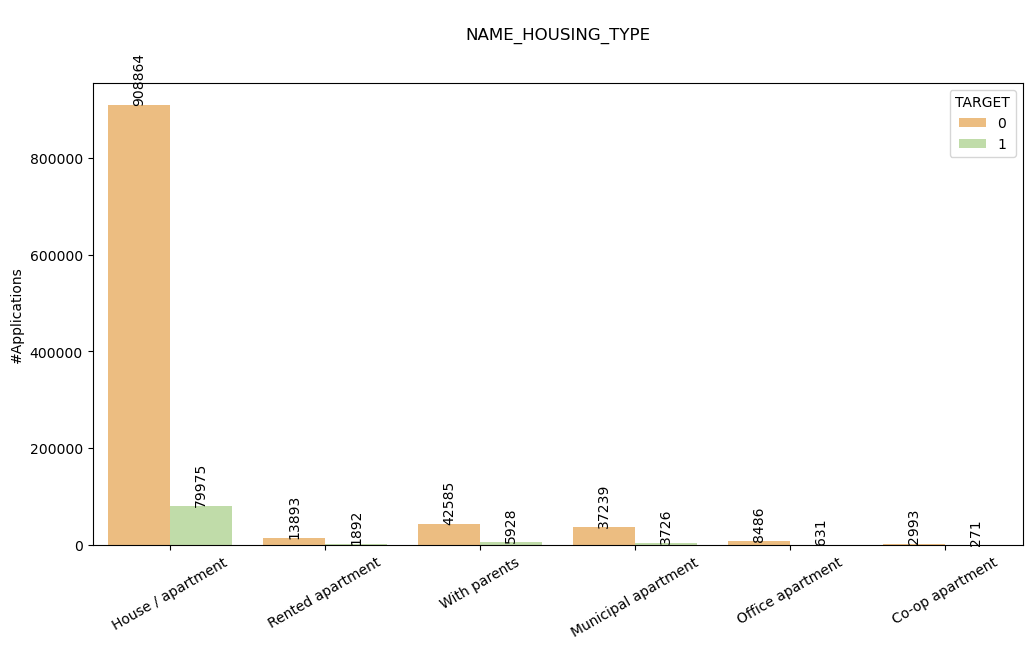

9)


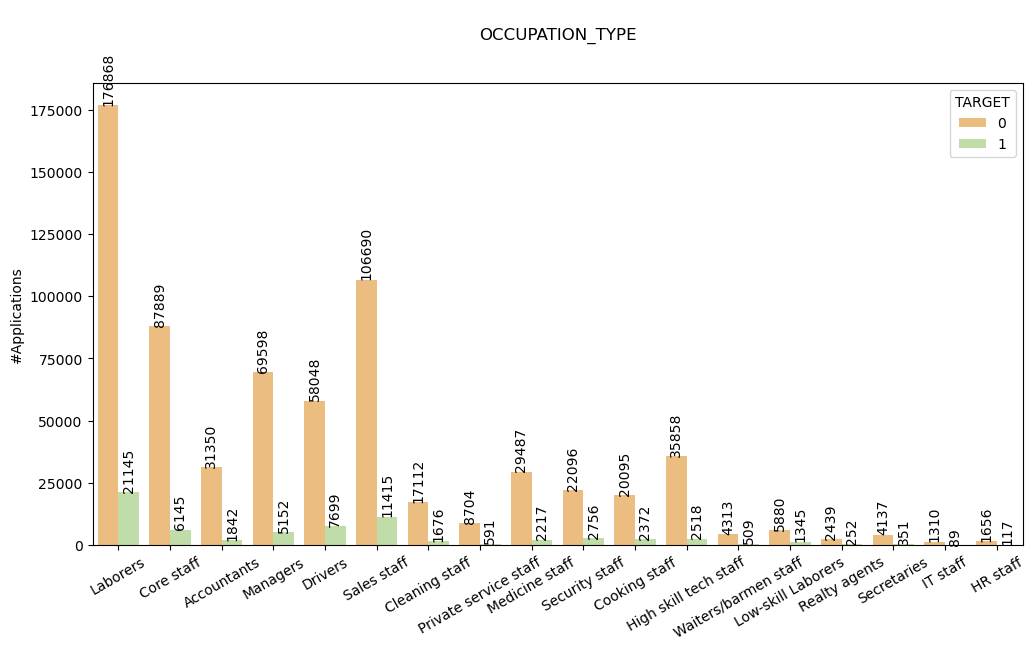

10)


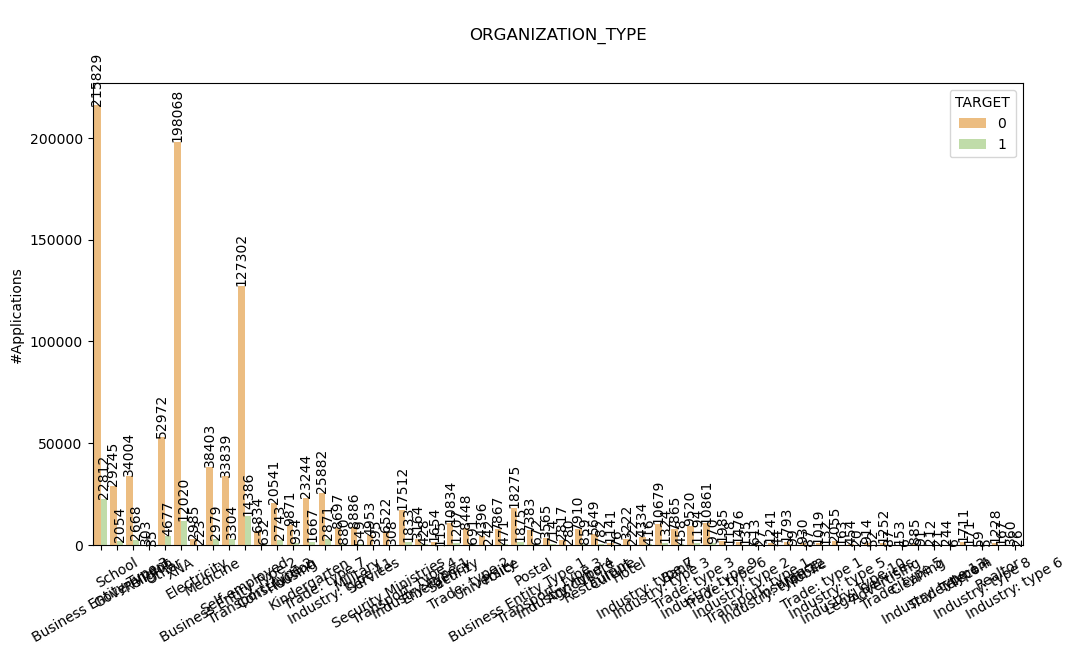

11)


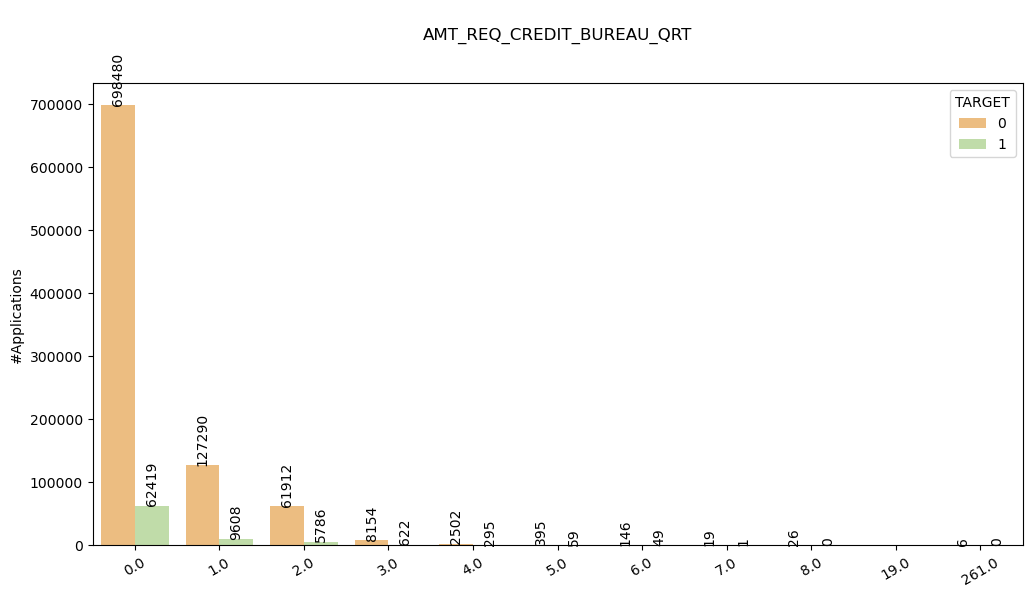

12)


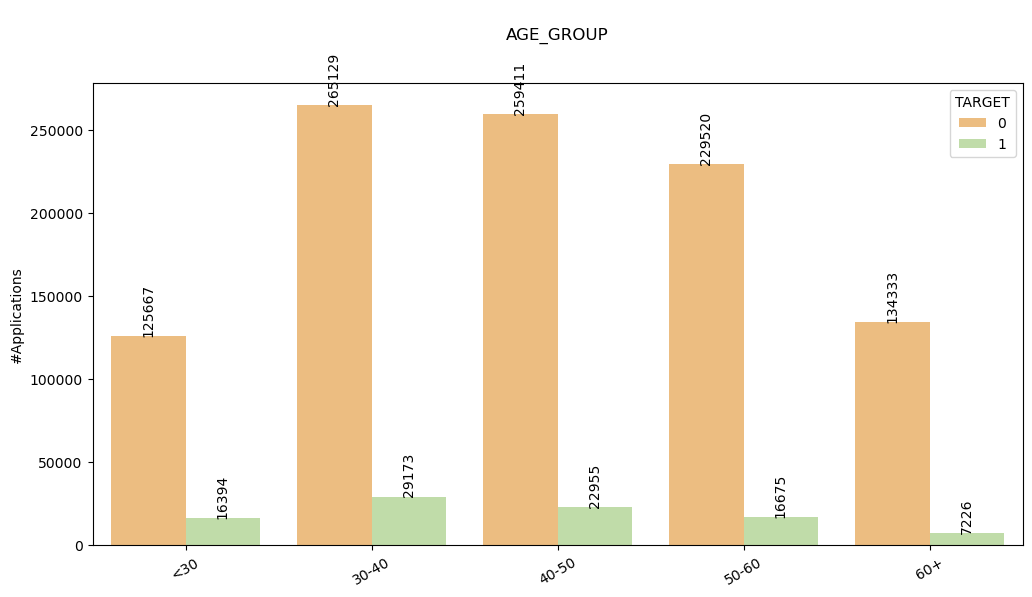

13)


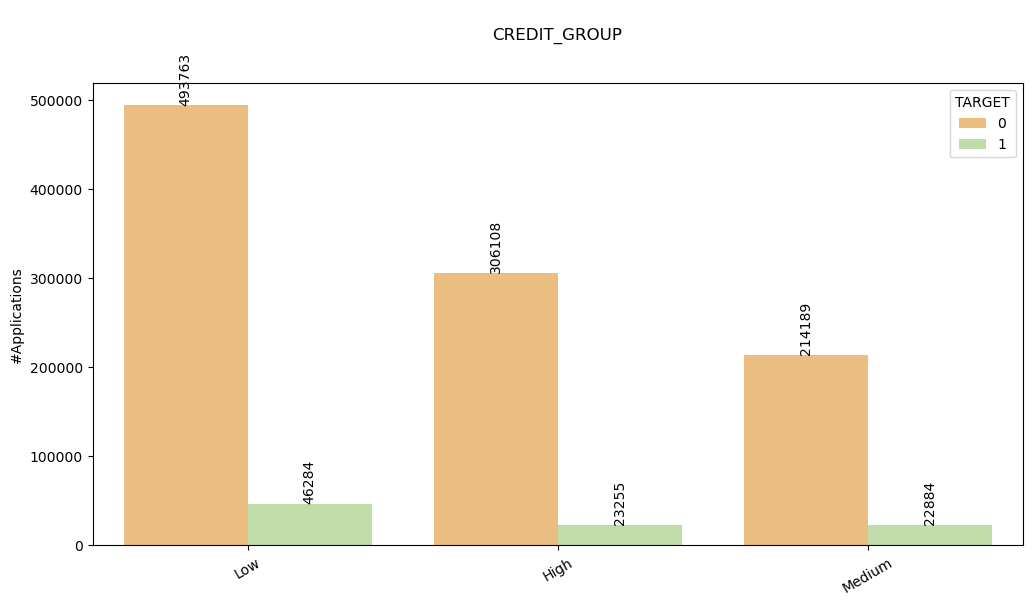

14)


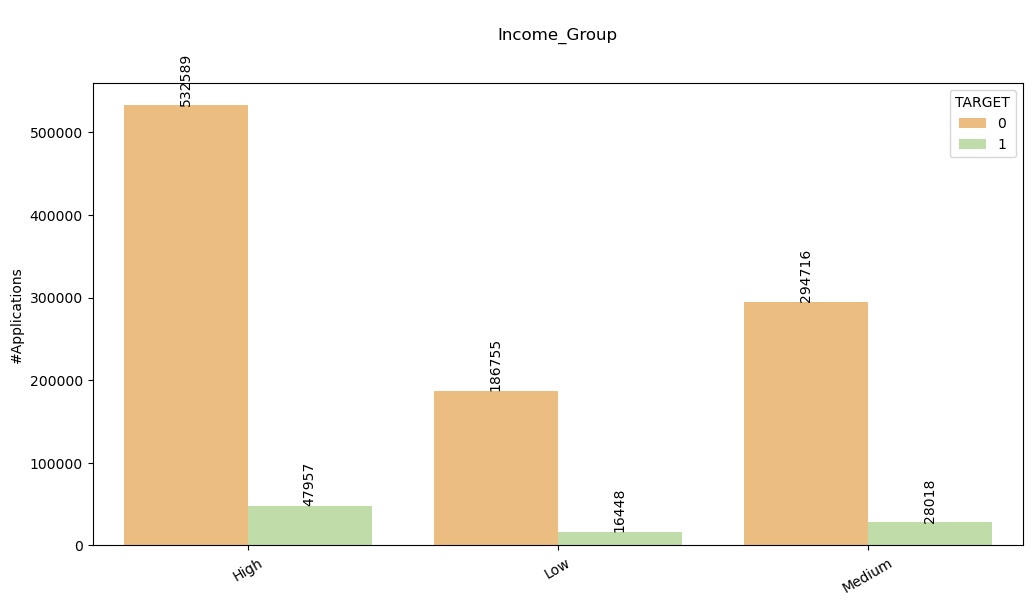

15)


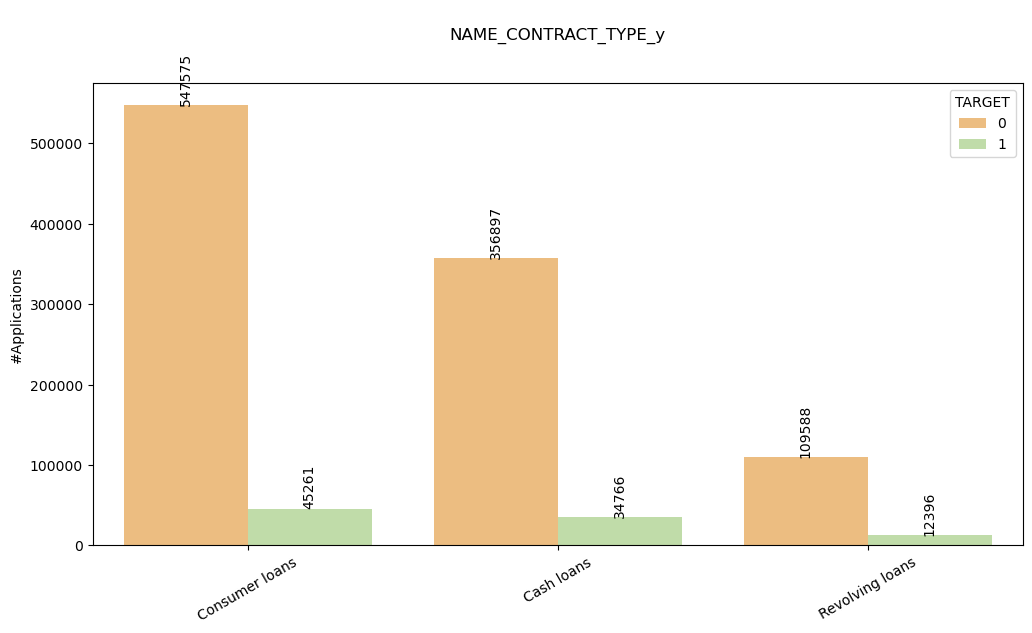

16)


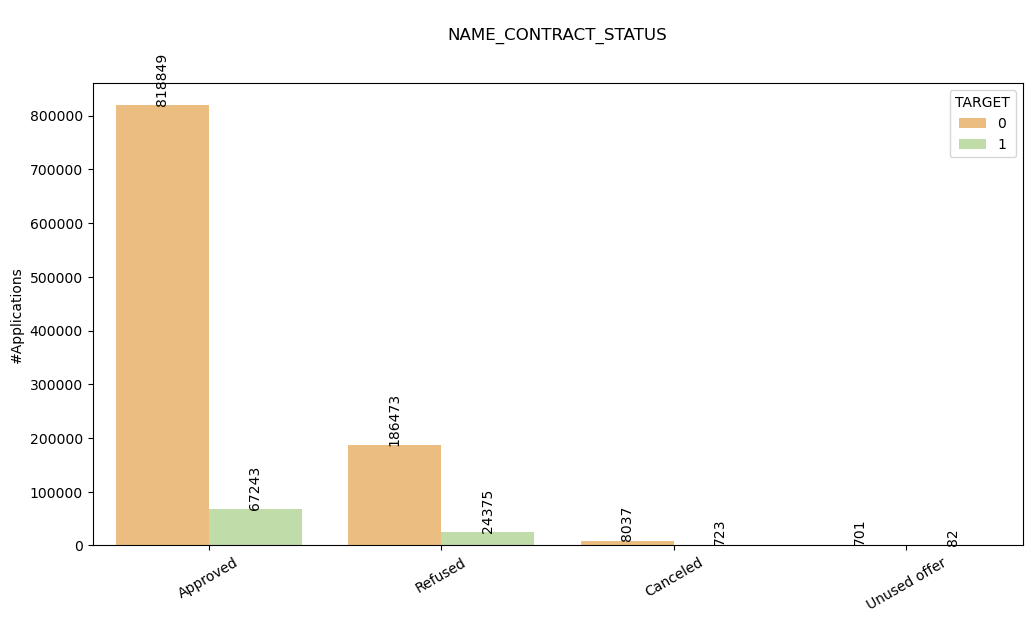

17)


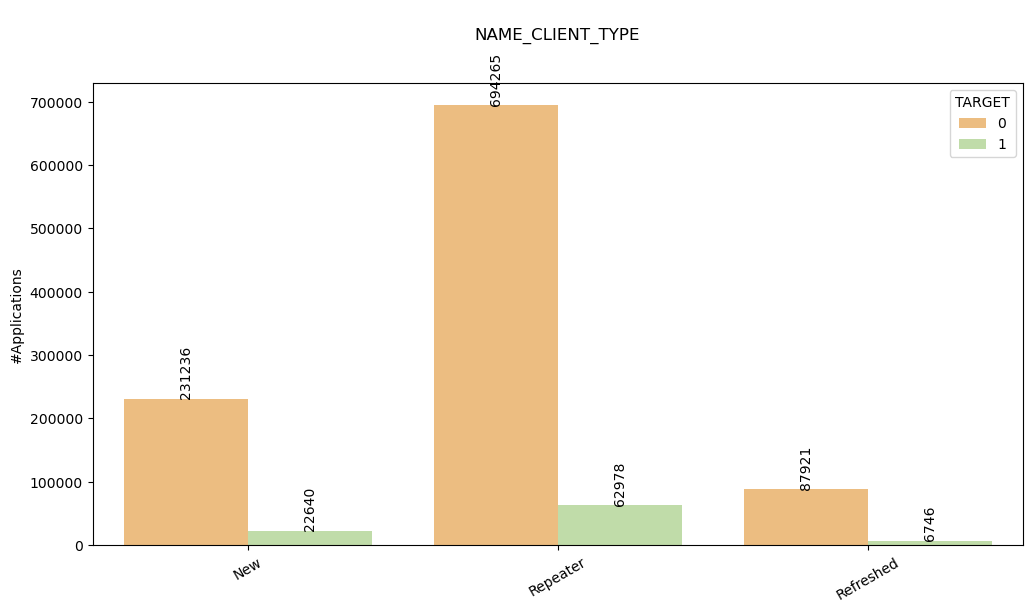

18)


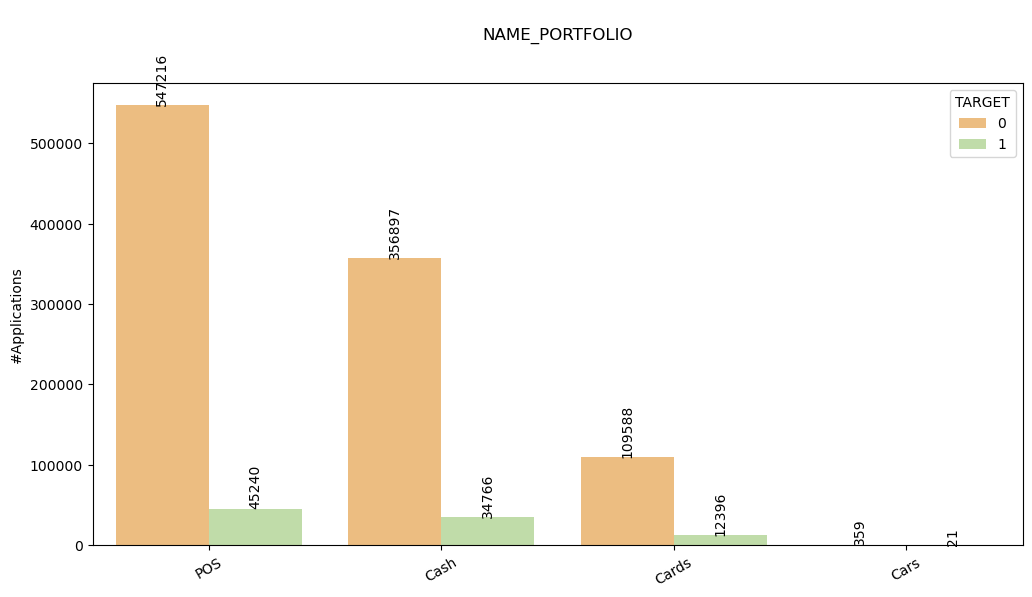

19)


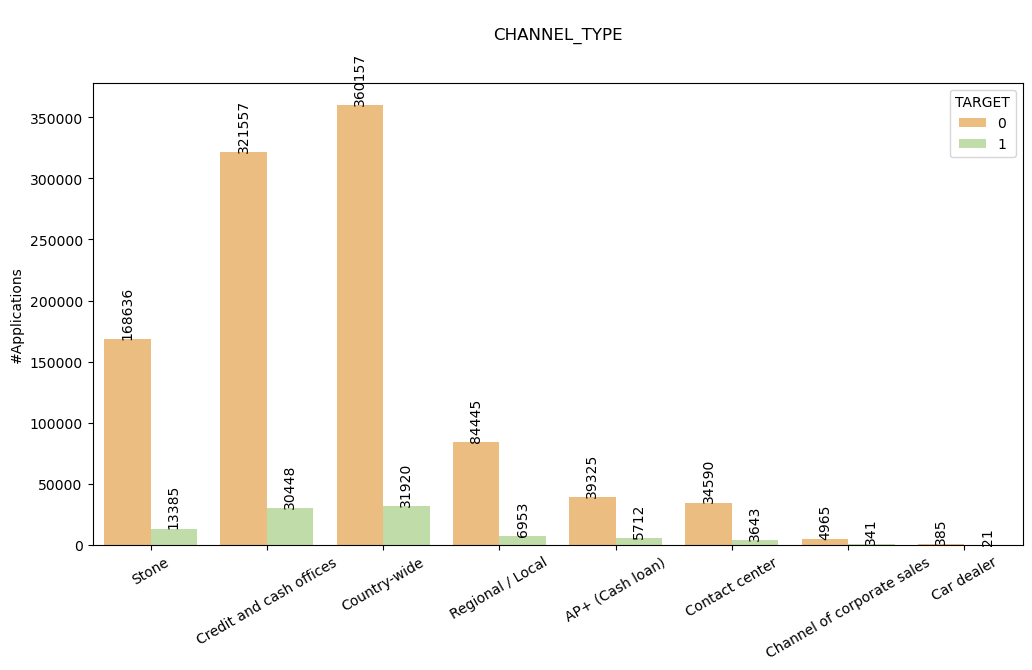

20)


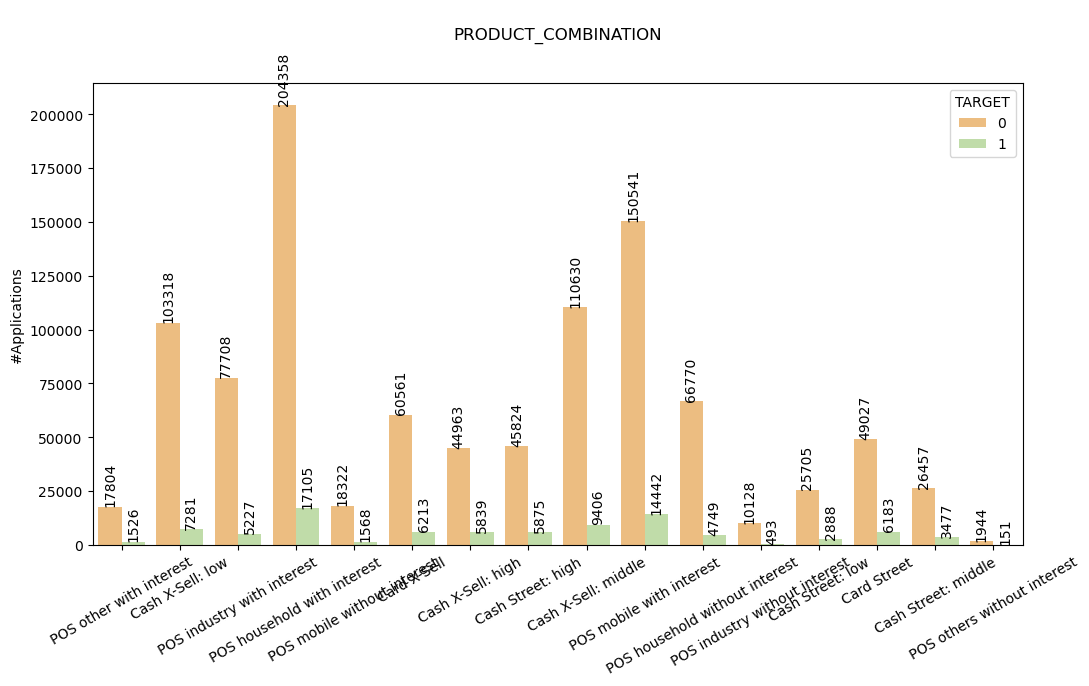

In [109]:
c=1
for i in object_merged:
    print(str(c)+")")
    c+=1
    plt.figure(figsize=(12,6))
    ax=sns.countplot(data=df_merged,x=i,hue="TARGET",palette='Spectral')
    for x in ax.containers:
        ax.bar_label(x,rotation=90)
    plt.xticks(rotation=30)
    plt.xlabel("\n\n")
    plt.ylabel("#Applications")
    plt.title("\n"+i+"\n\n")
    plt.show()

`**THANK YOU**`

------------------------------------------------------------------------------------`*BY: BHUMIKA JAIN*`-------------------------------------------------------------------------------------